# This is a work-in-progress notebook

We wish to know this:

1. How well does the model identify the correct number of senses for the target word?
2. **How well does the model identify the correct senses for the target word?**
3. **How well does the model assign the right words to a given sense of the target word?**
4. How well does the model assign the senses to the time intervals for the target word?

The script will evaluate **Q2** and **Q3**. Q4 will follow.

### Filenames of different model outputs must be different

In [452]:
# Basic variables and imports:

import codecs, csv, os, time, re, io
from os import listdir
from os.path import isfile, join
from  more_itertools import unique_everseen

# directories

dir_in = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_results"))
dir_out = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_output"))
#dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input"))
dir_expert = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "evaluation", "evaluation_input","new_texts"))

dir_parameter = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), "src", "dynamic-senses","greek_input","all_parameters"))

# change parameter file and senses etc here

s_senses = io.open(dir_expert+"/senses_15281.txt","r")  # expert senses annotation
k_senses = io.open(dir_in+"/output_harmonia_K5.dat","r") # model output
parameter_file = io.open(dir_parameter+"/params_v7.txt","r")

bugfix = 0

target_id = os.path.basename(s_senses.name)
target_id = target_id.replace("senses_","")
target_id = target_id.replace(".txt","")
print("Target ID:",target_id)

param_name = os.path.basename(parameter_file.name)
param_name = param_name.replace("params","")

print(s_senses)
print(k_senses)
print(param_name)
print(dir_out+"/"+target_id+param_name)


results_file = io.open(dir_out+"/"+target_id+param_name,"w")

# DEBUG:
#s_senses = io.open(dir_in+"/senses_69419_debug.txt","r")
#k_senses = io.open(dir_in+"/mus_debug.dat","r")
# k0 = mus4
# k1 = mus3
# k2 = mus2
# k3 = mus1
# k4 = nothing



file_senses = s_senses.readlines()[1:]
output_senses = k_senses.read()

i = 0
for line in parameter_file.readlines():
    i+=1
    if i == 4:
        line = line.split("\t")
        window_size = int(line[1])
        print("Window size:",window_size,type(window_size))
        
    if i == 13:
        line = line.split("\t")
        iterations = int(line[1])
        print("Iterations:",iterations,type(iterations))
        
    if i == 14:
        line = line.split("\t")
        start_time = int(line[1])
        print("Start time:",start_time,type(start_time))
        
    if i == 15:
        line = line.split("\t")
        end_time = int(line[1])
        print("End time:",end_time,type(end_time))
    
    if i == 16:
        line = line.split("\t")
        time_interval = int(line[1])
        print("Time interval:",time_interval,type(time_interval))

results_file.write("Target ID %s Window size %s Start time %s End time %s Time Interval %s Iterations %s\n" % (target_id,window_size,start_time,end_time,time_interval,iterations))

Target ID: 15281
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_input/new_texts/senses_15281.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/hengchen/git/seed-semantic-change/src/dynamic-senses/greek_input/all_results/output_harmonia_K5.dat' mode='r' encoding='UTF-8'>
_v7.txt
/Users/hengchen/git/seed-semantic-change/evaluation/evaluation_output/15281_v7.txt
Window size: 5 <class 'int'>
Iterations: 1000 <class 'int'>
Start time: -800 <class 'int'>
End time: 400 <class 'int'>
Time interval: 100 <class 'int'>


93

In [453]:
# Defining time periods from the output file

total_years = end_time-start_time
perioddd = 0
temp_start_time = start_time

for year in range(temp_start_time,end_time):
    if temp_start_time + time_interval < end_time:
        perioddd +=1
        print(perioddd)
        temp_start_time += time_interval

number_of_slices = perioddd + bugfix # cfr above

slice_duration = time_interval # read from the parameter file
print(slice_duration)

print(start_time,end_time)

slice_years = dict()

for period in range(0,number_of_slices):
    slice_years[period] = list()
    
    if period == number_of_slices-1:
        for i in range(latest_i,end_time):
            slice_years[period].append(i)  
    
    if period != number_of_slices-1:
        for i in range(start_time,end_time):
        
            if i > int(period*slice_duration) + start_time:
                if i < int((period+1)*slice_duration) + start_time:
                    slice_years[period].append(i)
                    latest_i = i
#print(slice_years)

1
2
3
4
5
6
7
8
9
10
11
100
-800 400


## TODO

- ~~create the notebook~~
- ~~organise the notebook~~
- ~~write "general idea" pseudocode for the evaluation~~
- ~~get input files~~
- ~~figure out data structures to store the variables~~
- ~~write actual code~~

## Q2: How well does the model identify the correct senses for the target word?

### Pseudocode 

In [454]:
# For each target word, we have a list of senses  s (given by the expert)
# For each target word, we have a list of senses k (given by the model)
# This Q consists in matching s and k, and doing so in a confident way --> confidence score

for each k:
    for each s:
        create conf(k,s)

# What is conf(k,s)?
        conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))/10 WHERE
    
            px = probability of word wx 
                
                and
            
            match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 
            
                    or 
                            0 if w_is_not_associated_to_s
                
# Once we have gone through all s for one k, we have to choose the best k for s. How? (TBD, cfr Valerio and Barbara)

# Once all ks have been assigned to all ss (or NA), we can calculate a general confidence score for the model.
# One easy way to do that: 

conf_score_model = number_of_non_NA/k

SyntaxError: invalid syntax (<ipython-input-454-82fa54601c9a>, line 5)

### Real code

Steps:

- extract all senses from the file
- use those senses as keys for a dictionary, `dict_of_words`
- fill the dictionary: for each key, we store a list of words pertaining to that sense
- transform the lists as sets so as to remove duplicates within the same sense
- create a dictionary with a word as a key and its weight as a value, depending on how many senses it appears
- parse the model output and get the probability weights for each word
- do not take into account the first line
- take care of empty lines

Todo:




In [455]:
expert_senses = list() # list where we store all sense ids provided by expert
#sense_for_period_counter = 0




for line in file_senses: 
    cells = line.split("\t")
    sense = cells[11] # The sense ID is after the 10th tab
    if sense != 'w':
        
        
        if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
            #print(int(s[12]))
            expert_senses.append(sense)
              
        else:
            expert_senses.append("NA") # if the reason for finding the sense is not "collocates" (1), the sense NA is created

    else:
         expert_senses.append("NA")

#print(len(expert_senses),expert_senses,len(set(expert_senses)))


expert_senses_set = list(set(expert_senses)) # we only keep the unique senses
expert_senses = list(unique_everseen(expert_senses))
print("SET",expert_senses_set)
print("ITERTOOLS",expert_senses)

number_of_s = len(expert_senses)  # we create a variable that stores the number of unique senses
print("Number of senses:",number_of_s,expert_senses)

# This dictionary has a sense as a key, and a list of words as a value. 
dict_of_words = dict()
# This list stores all words
list_of_all_words = list()
# This dictionary stores all words as keys and their weight as value
word_weight = dict()
# This dictionary stores the number of times a sense appears in a slice
sense_date_amount = dict()

# This list stores words in w and not collocates senses
list_of_NA_words = list()

dummy_counter = 0


sentences_smaller_than_window_size = 0

for i in range(0,number_of_s): # for each sense, we create a dictionary entry which has a list as value
#for i in range(2,3):
    dict_of_words[expert_senses[i]] = list()
    print(expert_senses[i])

    for line in file_senses: # we go back in the file
        cells = line.split("\t") # splitting on tabs
        if int(cells[12]) == 1:  # senses inferred from collocates
            if cells[11] == expert_senses[i]:      # we store all words for one sense 
                
        
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
        
        
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                list_of_ids_window = list()
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account

                        list_of_ids_window.append(list_of_ids[n])
                
                    except IndexError: # if there isn't, too bad
                        sentences_smaller_than_window_size += 1

                for word_id in list_of_ids_window:
                    if int(cells[12]) == 1:
                        
                        
                        if cells[11] == expert_senses[i]:  

                            dict_of_words[expert_senses[i]].append(word_id)                    
                            
                    
                    
                    list_of_all_words.append(word_id) # we store all words, we'll iterate over that for scores
            
            
            # if the sense is "w", the collocates are put in the "NA words"
            
            if cells[11] == "w":
                #print("W")
                sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
                list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
                index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
                list_of_ids_window = list()
                for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                    try:   # if there's a word it's taken into account

                        list_of_NA_words.append(list_of_ids[n])
                        list_of_all_words.append(list_of_ids[n])
                    except IndexError:
                        dummy_counter +=1
                    
        else:  # words that are in "non collocates senses"
            #print("NON COLOC")
            sentence_of_ids = cells[8] # 8 is for IDs, 9 is for words
            #print(sentence_of_ids)
            list_of_ids = sentence_of_ids.split(" ")  # splitting on spaces
            index_of_target = list_of_ids.index(target_id) # getting the location of the target word in the collocates
            #print(index_of_target)
            list_of_ids_window = list()
            #print(index_of_target-window_size,index_of_target+window_size+1)
            for n in range(index_of_target-window_size,index_of_target+window_size+1): # for every word in the window_size range
                try:   # if there's a word it's taken into account
                    #print(list_of_ids_window)
                    #print(list_of_ids[n])
                    list_of_NA_words.append(list_of_ids[n])
                    list_of_all_words.append(list_of_ids[n])
                except IndexError:
                        dummy_counter +=1
            #print(list_of_NA_words)
            
            
    # Here, we remove duplicates
    #dict_of_words[expert_senses[i]].append("79223") #testing
    
    dict_of_words[expert_senses[i]] = list(set(dict_of_words[expert_senses[i]]))
    
    
      
    print("i",i,"sense",expert_senses[i],"number of words",len(dict_of_words[expert_senses[i]]))
    print("words",set(dict_of_words[expert_senses[i]]))
    print("\n\n")

# NOW THAT WE HAVE A LIST OF NA WORDS 
# We can pyt that in the dict_of_words[expert_sense] dictionary
#print("NA words",list_of_NA_words)
list_of_NA_words = list(set(list_of_NA_words))
dict_of_words["NA"] = list_of_NA_words

print("sentences smaller than window size",window_size,":",sentences_smaller_than_window_size)
#print("dummy",dummy_counter)
print("number of NA words:",len(list_of_NA_words))
print("same?",len(dict_of_words["NA"]))

results_file.write("Expert senses %s Total %s \n" %(expert_senses,len(expert_senses)))

SET ['harmonia-4.3α', 'harmonia-4.4', 'harmonia-3', 'harmonia-1', 'harmonia-4.1', 'harmonia-5', 'harmonia-4.5', 'harmonia-4.3β', 'harmonia-4.3', 'harmonia-4.6', 'NA']
ITERTOOLS ['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
Number of senses: 11 ['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
harmonia-1
i 0 sense harmonia-1 number of words 216
words {'104724', '8665', '73277', '75552', '66494', '82190', '31161', '83904', '102000', '26183', '70743', '96375', '99647', '43206', '66295', '76912', '32544', '10923', '15274', '112472', '94004', '36241', '25882', '7513', '115887', '104538', '109757', '60646', '5274', '99507', '52774', '14339', '25905', '22615', '66173', '65565', '12485', '67222', '28566', '46863', '42290', '57460', '16400', '32630', '98975', '74621', 

187

In [456]:
sense_date_amount = dict() # dict where we have the number of senses for [sense,period]

# this dictionary is now initialised with 0 for each CORRECT sense,period pair we have
for sense in expert_senses:
    for period in slice_years.keys():
        sense_date_amount[sense,period] = 0
        
print(sense_date_amount,"\n")        

counter = 0

for line in file_senses: 
    #print(len(file_senses))
    cells = line.split("\t")
    sense = cells[11] # The sense ID is after the 10th tab
    if sense != 'w':
        #print(sense)
        
        
        if int(cells[12]) == 1:   ## we only take the senses annotated because of collocates and nothing else
            #print(int(s[12]))
            #expert_senses.append(sense)
            
            for period in slice_years.keys():
                if int(cells[0]) in slice_years[period]:
                    #sense_for_period_counter += 1
                    sense_date_amount[sense,period] += 1
                    counter += 1
                    
print(sense_date_amount)
print(counter)

{('harmonia-1', 0): 0, ('harmonia-1', 1): 0, ('harmonia-1', 2): 0, ('harmonia-1', 3): 0, ('harmonia-1', 4): 0, ('harmonia-1', 5): 0, ('harmonia-1', 6): 0, ('harmonia-1', 7): 0, ('harmonia-1', 8): 0, ('harmonia-1', 9): 0, ('harmonia-1', 10): 0, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 0, ('NA', 4): 0, ('NA', 5): 0, ('NA', 6): 0, ('NA', 7): 0, ('NA', 8): 0, ('NA', 9): 0, ('NA', 10): 0, ('harmonia-4.3', 0): 0, ('harmonia-4.3', 1): 0, ('harmonia-4.3', 2): 0, ('harmonia-4.3', 3): 0, ('harmonia-4.3', 4): 0, ('harmonia-4.3', 5): 0, ('harmonia-4.3', 6): 0, ('harmonia-4.3', 7): 0, ('harmonia-4.3', 8): 0, ('harmonia-4.3', 9): 0, ('harmonia-4.3', 10): 0, ('harmonia-4.3β', 0): 0, ('harmonia-4.3β', 1): 0, ('harmonia-4.3β', 2): 0, ('harmonia-4.3β', 3): 0, ('harmonia-4.3β', 4): 0, ('harmonia-4.3β', 5): 0, ('harmonia-4.3β', 6): 0, ('harmonia-4.3β', 7): 0, ('harmonia-4.3β', 8): 0, ('harmonia-4.3β', 9): 0, ('harmonia-4.3β', 10): 0, ('harmonia-4.3α', 0): 0, ('harmonia-4.3α', 1): 0, ('harmonia

In [457]:
# For every word in the list of words that we have
# we count the number of senses it appears in
# we use that number to divide its importance: 1 sense = 1 importance; 2 senses = 0.5 importance
# this can be finetuned

print(expert_senses)
#print("list_of_NA_words",list_of_NA_words,"\n\n")
#print("list of mus 1 words",dict_of_words['mus-1'])

# This dictionary stores words in w and not collocates senses
word_weight_NA = dict()

for word in list_of_all_words:
#word = "113560"
    x = 0  # number of times word appears in different senses excluding NAs
    z = 0 # number of times word appears in different senses including NAs
#print(word)
    for i in range(0,number_of_s):
        if word in dict_of_words[expert_senses[i]]:
            #if word == "105344":
            #    print("YO")
                
            if expert_senses[i] != "NA":
                x += 1 
                #print("froot the loop")
                

    if x != 0:
        word_weight[word] = float(1/x)
        #print(word,"this is a x!=0",x,"this is its weight",float(1/x))
        
        if word in list_of_NA_words:
            z = x + 1
            #print(z)
            #print(word,"this is a z",z,"this is its weight",float(1/z))
            
            word_weight_NA[word] = float(1/z)
            
    else:  # if word doesn't exist in non-NA senses
        word_weight_NA[word] = 1/1
        word_weight[word] = 0  # with this we prevent the case that a word that is ONLY in NA has no weight 
  
        
    #else: 
    #    word_weight_NA[word] = word_weight[word]
        
#print(word_weight_NA)    
#print(word,word_weight[word])

#print(word_weight_NA["53826"])

#for key in word_weight_NA.keys():
#    print(key,word_weight_NA[key])
for word in list_of_all_words:
    try: 
        print(word,word_weight[word])
    except KeyError:
        print(word,"isnt in non-NA senses")
    try:
        print(word,word_weight_NA[word])
    except KeyError:
        print(word,"isnt in NA sense")

['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']
15281 0.1
15281 0.09090909090909091
14708 1.0
14708 0.5
103388 1.0
103388 isnt in NA sense
15274 0.3333333333333333
15274 0.25
22615 1.0
22615 isnt in NA sense
15281 0.1
15281 0.09090909090909091
14708 1.0
14708 0.5
66294 0.5
66294 0.3333333333333333
104119 1.0
104119 isnt in NA sense
3903 1.0
3903 isnt in NA sense
79983 0.5
79983 0.3333333333333333
28101 1.0
28101 isnt in NA sense
15281 0.1
15281 0.09090909090909091
14705 1.0
14705 isnt in NA sense
104448 1.0
104448 isnt in NA sense
66294 0.5
66294 0.3333333333333333
104119 1.0
104119 isnt in NA sense
3903 1.0
3903 isnt in NA sense
70312 0
70312 1.0
7094 0
7094 1.0
33304 0
33304 1.0
45499 0
45499 1.0
71023 0.3333333333333333
71023 0.25
15281 0.1
15281 0.09090909090909091
20097 0
20097 1.0
75552 0.25
75552 0.2
70312 0
70312 1.0
48910 1.0
48910 0.5
79418 0
79418 1.0
20600 0
20

84234 0.25
84234 0.2
28139 0
28139 1.0
74126 0.5
74126 0.3333333333333333
15281 0.1
15281 0.09090909090909091
74735 0.5
74735 0.3333333333333333
47917 0
47917 1.0
95641 0
95641 1.0
59735 0.5
59735 0.3333333333333333
63772 0.16666666666666666
63772 0.14285714285714285
18195 1.0
18195 0.5
112834 0.5
112834 0.3333333333333333
78352 0
78352 1.0
48504 0
48504 1.0
32417 0.5
32417 0.3333333333333333
15281 0.1
15281 0.09090909090909091
47685 1.0
47685 0.5
62259 1.0
62259 0.5
110734 0.3333333333333333
110734 0.25
64137 0
64137 1.0
81432 0
81432 1.0
105829 1.0
105829 0.5
97767 0.3333333333333333
97767 0.25
27847 0.2
27847 0.16666666666666666
12676 0
12676 1.0
17049 0
17049 1.0
15281 0.1
15281 0.09090909090909091
113356 1.0
113356 0.5
47917 0
47917 1.0
49908 0
49908 1.0
73064 0.5
73064 0.3333333333333333
111282 0
111282 1.0
35061 1.0
35061 0.5
12485 0.3333333333333333
12485 0.25
4845 0.5
4845 0.3333333333333333
46712 0.3333333333333333
46712 0.25
79425 1.0
79425 0.5
15281 0.1
15281 0.090909090909

65552 0.5
65552 0.3333333333333333
nlsj2729 0
nlsj2729 1.0
83622 0.5
83622 0.3333333333333333
62204 0.2
62204 0.16666666666666666
93711 1.0
93711 0.5
15281 0.1
15281 0.09090909090909091
48051 0.5
48051 0.3333333333333333
65552 0.5
65552 0.3333333333333333
nlsj2729 0
nlsj2729 1.0
83622 0.5
83622 0.3333333333333333
62204 0.2
62204 0.16666666666666666
66295 0.5
66295 0.3333333333333333
65565 0.3333333333333333
65565 0.25
107773 0
107773 1.0
15047 0.3333333333333333
15047 0.25
51086 0
51086 1.0
15281 0.1
15281 0.09090909090909091
75926 0.5
75926 0.3333333333333333
112720 0.25
112720 0.2
45996 0.2
45996 0.16666666666666666
48051 0.5
48051 0.3333333333333333
nlsj61372 0.25
nlsj61372 0.2
28569 0.3333333333333333
28569 0.25
98234 0
98234 1.0
107773 0
107773 1.0
107520 0
107520 1.0
107520 0
107520 1.0
15281 0.1
15281 0.09090909090909091
66295 0.5
66295 0.3333333333333333
66295 0.5
66295 0.3333333333333333
66507 0
66507 1.0
66507 0
66507 1.0
15047 0.3333333333333333
15047 0.25
45996 0.2
45996 0.

116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
104311 1.0
104311 0.5
64165 0.3333333333333333
64165 0.25
110114 0.3333333333333333
110114 0.25
26197 0.5
26197 0.3333333333333333
26197 0.5
26197 0.3333333333333333
85306 0.2
85306 0.16666666666666666
4587 0
4587 1.0
15281 0.1
15281 0.09090909090909091
110114 0.3333333333333333
110114 0.25
26197 0.5
26197 0.3333333333333333
26197 0.5
26197 0.3333333333333333
16667 0
16667 1.0
15281 0.1
15281 0.09090909090909091
63724 1.0
63724 0.5
16667 0
16667 1.0
15281 0.1
15281 0.09090909090909091
63724 1.0
63724 0.5
54247 0
54247 1.0
98979 0.25
98979 0.2
98358 0
98358 1.0
68876 0.5
68876 0.3333333333333333
26447 1.0
26447 0.5
15281 0.1
15281 0.09090909090909091
97505 1.0
97505 0.5
45996 0.2
45996 0.16666666666666666
112070 0
112070 1.0
115887 0.3333333333333333
115887 0.25
81774 1.0
81774 0.5
nlsj59172 0
nlsj59172 1.0
18550 0
18550 1.0
45442 0
45442 1.0
34653 0.5
34653 0.3333333333333333
48051 0.5
48051 0.3333333333333333
15281 0.1
15281 0

15047 0.3333333333333333
15047 0.25
27371 0
27371 1.0
5131 0
5131 1.0
98417 1.0
98417 0.5
22209 0.16666666666666666
22209 0.14285714285714285
67352 1.0
67352 0.5
80155 0
80155 1.0
15281 0.1
15281 0.09090909090909091
110734 0.3333333333333333
110734 0.25
48579 0
48579 1.0
37776 0.3333333333333333
37776 0.25
102000 0.25
102000 0.2
16527 1.0
16527 0.5
84034 1.0
84034 0.5
31236 0.16666666666666666
31236 0.14285714285714285
1564 0.3333333333333333
1564 0.25
59660 0.25
59660 0.2
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
5182 0
5182 1.0
52035 0.5
52035 0.3333333333333333
26259 0
26259 1.0
73742 0.5
73742 0.3333333333333333
nlsj63435 0
nlsj63435 1.0
19789 0
19789 1.0
112794 0.3333333333333333
112794 0.25
35219 1.0
35219 0.5
65628 0
65628 1.0
15281 0.1
15281 0.09090909090909091
58450 0.5
58450 0.3333333333333333
11894 1.0
11894 0.5
252 0
252 1.0
15893 0.3333333333333333
15893 0.25
111537 0
111537 1.0
111023 1.0
111023 0.5
84534 0.5
84534 0.3333333333333333
15281 0.1
15281 0.090

19975 1.0
66187 0.5
66187 0.3333333333333333
44143 0
44143 1.0
72627 0.3333333333333333
72627 0.25
92716 0
92716 1.0
27027 0
27027 1.0
15281 0.1
15281 0.09090909090909091
60157 0
60157 1.0
43147 0
43147 1.0
113163 0
113163 1.0
46735 0
46735 1.0
65624 1.0
65624 0.5
nlsj8014 0
nlsj8014 1.0
19412 0
19412 1.0
1837 0
1837 1.0
59098 0
59098 1.0
26804 1.0
26804 0.5
15281 0.1
15281 0.09090909090909091
39192 0
39192 1.0
49780 0
49780 1.0
19183 1.0
19183 0.5
83030 0
83030 1.0
39762 0
39762 1.0
70312 0
70312 1.0
7094 0
7094 1.0
33304 0
33304 1.0
45499 0
45499 1.0
71023 0.3333333333333333
71023 0.25
15281 0.1
15281 0.09090909090909091
20097 0
20097 1.0
75552 0.25
75552 0.2
70312 0
70312 1.0
37716 1.0
37716 isnt in NA sense
22389 0.5
22389 isnt in NA sense
17595 1.0
17595 0.5
112125 1.0
112125 0.5
64050 1.0
64050 0.5
15281 0.1
15281 0.09090909090909091
66187 0.5
66187 0.3333333333333333
110979 1.0
110979 isnt in NA sense
nlsj8342 1.0
nlsj8342 isnt in NA sense
61016 1.0
61016 isnt in NA sense
35541 

56723 0.25
75480 0.5
75480 isnt in NA sense
84534 0.5
84534 0.3333333333333333
42648 0.5
42648 0.3333333333333333
55714 1.0
55714 isnt in NA sense
89405 1.0
89405 isnt in NA sense
77928 1.0
77928 0.5
41798 0.5
41798 isnt in NA sense
52571 0.3333333333333333
52571 0.25
15281 0.1
15281 0.09090909090909091
57466 0.5
57466 isnt in NA sense
102000 0.25
102000 0.2
43206 0.2
43206 0.16666666666666666
35360 0.5
35360 isnt in NA sense
76512 0.5
76512 0.3333333333333333
75552 0.25
75552 0.2
68890 0.3333333333333333
68890 0.25
112833 0.3333333333333333
112833 0.25
114651 1.0
114651 0.5
3261 0.3333333333333333
3261 0.25
15281 0.1
15281 0.09090909090909091
26447 1.0
26447 0.5
54247 0
54247 1.0
98979 0.25
98979 0.2
98358 0
98358 1.0
68876 0.5
68876 0.3333333333333333
26447 1.0
26447 0.5
15281 0.1
15281 0.09090909090909091
97505 1.0
97505 0.5
45996 0.2
45996 0.16666666666666666
112070 0
112070 1.0
115887 0.3333333333333333
115887 0.25
81774 1.0
81774 0.5
nlsj59172 0
nlsj59172 1.0
18550 0
18550 1.0
45

84801 0.5
84801 isnt in NA sense
101851 0.3333333333333333
101851 0.25
104639 0.5
104639 isnt in NA sense
15281 0.1
15281 0.09090909090909091
102676 0.5
102676 0.3333333333333333
93803 0.5
93803 isnt in NA sense
35061 1.0
35061 0.5
12485 0.3333333333333333
12485 0.25
4845 0.5
4845 0.3333333333333333
46712 0.3333333333333333
46712 0.25
79425 1.0
79425 0.5
15281 0.1
15281 0.09090909090909091
35061 1.0
35061 0.5
12485 0.3333333333333333
12485 0.25
4845 0.5
4845 0.3333333333333333
46712 0.3333333333333333
46712 0.25
79425 1.0
79425 0.5
79223 0
79223 1.0
108411 0
108411 1.0
68641 0.3333333333333333
68641 0.25
80328 1.0
80328 0.5
nlsj59172 0
nlsj59172 1.0
15281 0.1
15281 0.09090909090909091
112703 1.0
112703 0.5
8909 0.3333333333333333
8909 0.25
65362 0
65362 1.0
76530 0.5
76530 0.3333333333333333
47931 0.3333333333333333
47931 0.25
35420 0
35420 1.0
22483 0
22483 1.0
72610 0.25
72610 0.2
15345 0
15345 1.0
100583 0.3333333333333333
100583 0.25
15281 0.1
15281 0.09090909090909091
63772 0.1666

90340 0.5
22502 1.0
22502 0.5
82190 0.5
82190 0.3333333333333333
5112 0.3333333333333333
5112 isnt in NA sense
68891 0.3333333333333333
68891 0.25
72610 0.25
72610 0.2
25053 1.0
25053 isnt in NA sense
92783 0.3333333333333333
92783 0.25
15281 0.1
15281 0.09090909090909091
45794 0.5
45794 0.3333333333333333
115310 1.0
115310 isnt in NA sense
57343 1.0
57343 0.5
28566 0.5
28566 0.3333333333333333
15281 0.1
15281 0.09090909090909091
74378 0.5
74378 isnt in NA sense
19477 0.5
19477 isnt in NA sense
68891 0.3333333333333333
68891 0.25
27438 1.0
27438 isnt in NA sense
15281 0.1
15281 0.09090909090909091
74378 0.5
74378 isnt in NA sense
19477 0.5
19477 isnt in NA sense
65565 0.3333333333333333
65565 0.25
63772 0.16666666666666666
63772 0.14285714285714285
66295 0.5
66295 0.3333333333333333
73277 0.3333333333333333
73277 0.25
51182 1.0
51182 0.5
15281 0.1
15281 0.09090909090909091
22813 0
22813 1.0
76703 1.0
76703 0.5
37885 1.0
37885 0.5
42214 0.3333333333333333
42214 0.25
72202 1.0
72202 0.5


45996 0.2
45996 0.16666666666666666
91547 0.5
91547 0.3333333333333333
31945 1.0
31945 0.5
112720 0.25
112720 0.2
2665 0
2665 1.0
2670 0
2670 1.0
15281 0.1
15281 0.09090909090909091
103745 1.0
103745 0.5
2668 0.5
2668 0.3333333333333333
77916 0
77916 1.0
2671 0
2671 1.0
8909 0.3333333333333333
8909 0.25
114725 1.0
114725 0.5
102000 0.25
102000 0.2
65975 0.5
65975 0.3333333333333333
31236 0.16666666666666666
31236 0.14285714285714285
99858 0
99858 1.0
15281 0.1
15281 0.09090909090909091
36459 0.5
36459 0.3333333333333333
64190 1.0
64190 isnt in NA sense
3398 0.5
3398 isnt in NA sense
62816 1.0
62816 isnt in NA sense
16988 1.0
16988 isnt in NA sense
112720 0.25
112720 0.2
15281 0.1
15281 0.09090909090909091
55872 1.0
55872 isnt in NA sense
46782 0.5
46782 0.3333333333333333
68876 0.5
68876 0.3333333333333333
nlsj3768 1.0
nlsj3768 isnt in NA sense
95898 1.0
95898 isnt in NA sense
47687 1.0
47687 isnt in NA sense
15281 0.1
15281 0.09090909090909091
64167 1.0
64167 isnt in NA sense
30040 1.

81774 1.0
81774 0.5
37585 0
37585 1.0
54469 1.0
54469 0.5
15281 0.1
15281 0.09090909090909091
82483 0
82483 1.0
54631 0
54631 1.0
54631 0
54631 1.0
37537 0
37537 1.0
15842 0.5
15842 0.3333333333333333
104421 1.0
104421 0.5
112217 0
112217 1.0
24648 1.0
24648 0.5
15047 0.3333333333333333
15047 0.25
101468 0
101468 1.0
15281 0.1
15281 0.09090909090909091
101445 1.0
101445 0.5
11583 0.25
11583 0.2
16664 1.0
16664 0.5
82483 0
82483 1.0
73748 0.5
73748 0.3333333333333333
11583 0.25
11583 0.2
84234 0.25
84234 0.2
67856 1.0
67856 0.5
92783 0.3333333333333333
92783 0.25
63772 0.16666666666666666
63772 0.14285714285714285
15281 0.1
15281 0.09090909090909091
115213 0.25
115213 0.2
nlsj39496 0.5
nlsj39496 0.3333333333333333
72627 0.3333333333333333
72627 0.25
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
76512 0.5
76512 0.3333333333333333
86184 0.5
86184 isnt in NA sense
92783 0.3333333333333333
92783 0.25
67853 0.5
67853 isnt in NA sense
115213 0.25
115213 0.2
15281 0.1

73672 0.3333333333333333
73672 0.25
11174 1.0
11174 0.5
102676 0.5
102676 0.3333333333333333
2665 0
2665 1.0
67014 0
67014 1.0
74126 0.5
74126 0.3333333333333333
15281 0.1
15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
292 0
292 1.0
113379 0
113379 1.0
463 0
463 1.0
17034 0
17034 1.0
324 0
324 1.0
84421 1.0
84421 0.5
34138 0.5
34138 0.3333333333333333
56723 0.3333333333333333
56723 0.25
98979 0.25
98979 0.2
15281 0.1
15281 0.09090909090909091
45996 0.2
45996 0.16666666666666666
65295 1.0
65295 0.5
87549 0
87549 1.0
68876 0.5
68876 0.3333333333333333
19546 1.0
19546 0.5
86453 0
86453 1.0
11213 1.0
11213 0.5
51849 0
51849 1.0
84505 0.3333333333333333
84505 0.25
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
48383 0
48383 1.0
80327 1.0
80327 0.5
48291 0.3333333333333333
48291 0.25
41357 0
41357 1.0
11106 0.5
11106 0.3333333333333333
15281 0.1
15281 0.09090909090909091
76530 0.5
76530 0.3333333333333333
11305 1.0
11305 0.5
102736 0
102736 1.0
4791

nlsj80526 0
nlsj80526 1.0
66820 0
66820 1.0
18519 1.0
18519 0.5
58790 0
58790 1.0
22425 0
22425 1.0
74752 0.3333333333333333
74752 0.25
103681 0
103681 1.0
98955 0
98955 1.0
15281 0.1
15281 0.09090909090909091
96942 0
96942 1.0
1837 0
1837 1.0
98069 0
98069 1.0
nlsj39496 0.5
nlsj39496 0.3333333333333333
22797 0
22797 1.0
31352 1.0
31352 isnt in NA sense
66196 1.0
66196 isnt in NA sense
96981 1.0
96981 isnt in NA sense
nlsj112815 0.5
nlsj112815 0.3333333333333333
42267 0.5
42267 isnt in NA sense
15281 0.1
15281 0.09090909090909091
90661 1.0
90661 isnt in NA sense
111032 0.5
111032 isnt in NA sense
90009 1.0
90009 isnt in NA sense
24184 0.5
24184 0.3333333333333333
45354 0
45354 1.0
76805 0
76805 1.0
19865 0
19865 1.0
77035 1.0
77035 0.5
28097 0
28097 1.0
15281 0.1
15281 0.09090909090909091
26436 0
26436 1.0
17453 1.0
17453 0.5
14708 1.0
14708 0.5
106709 0
106709 1.0
nlsj5575 1.0
nlsj5575 0.5
75455 1.0
75455 isnt in NA sense
73449 1.0
73449 isnt in NA sense
46756 1.0
46756 isnt in NA sen

56277 1.0
56991 1.0
56991 0.5
112833 0.3333333333333333
112833 0.25
15281 0.1
15281 0.09090909090909091
6817 1.0
6817 0.5
8665 0.3333333333333333
8665 0.25
83774 0
83774 1.0
8909 0.3333333333333333
8909 0.25
46804 1.0
46804 0.5
88687 0
88687 1.0
25401 0.5
25401 0.3333333333333333
114651 1.0
114651 0.5
31607 0.5
31607 0.3333333333333333
52571 0.3333333333333333
52571 0.25
15281 0.1
15281 0.09090909090909091
105829 1.0
105829 0.5
nlsj61372 0.25
nlsj61372 0.2
72627 0.3333333333333333
72627 0.25
84234 0.25
84234 0.2
67260 0.25
67260 0.2
27335 0
27335 1.0
3508 0
3508 1.0
18107 1.0
18107 0.5
113379 0
113379 1.0
84234 0.25
84234 0.2
15281 0.1
15281 0.09090909090909091
65088 0
65088 1.0
43206 0.2
43206 0.16666666666666666
52035 0.5
52035 0.3333333333333333
41335 0.5
41335 0.3333333333333333
113356 1.0
113356 0.5
15281 0.1
15281 0.09090909090909091
108215 1.0
108215 0.5
59735 0.5
59735 0.3333333333333333
72254 0.5
72254 0.3333333333333333
12485 0.3333333333333333
12485 0.25
108536 0.33333333333

73742 0.5
73742 0.3333333333333333
nlsj63435 0
nlsj63435 1.0
19789 0
19789 1.0
112794 0.3333333333333333
112794 0.25
35219 1.0
35219 0.5
65628 0
65628 1.0
15281 0.1
15281 0.09090909090909091
58450 0.5
58450 0.3333333333333333
11894 1.0
11894 0.5
114548 0.3333333333333333
114548 isnt in NA sense
92711 1.0
92711 isnt in NA sense
70522 1.0
70522 isnt in NA sense
54345 1.0
54345 isnt in NA sense
88498 0.3333333333333333
88498 isnt in NA sense
15281 0.1
15281 0.09090909090909091
115193 0.5
115193 isnt in NA sense
18996 1.0
18996 isnt in NA sense
36620 1.0
36620 isnt in NA sense
94815 1.0
94815 isnt in NA sense
22209 0.16666666666666666
22209 0.14285714285714285
75954 0.5
75954 0.3333333333333333
15281 0.1
15281 0.09090909090909091
59339 0.25
59339 0.2
64165 0.3333333333333333
64165 0.25
104311 1.0
104311 0.5
nlsj1123 1.0
nlsj1123 isnt in NA sense
76965 1.0
76965 isnt in NA sense
15281 0.1
15281 0.09090909090909091
59339 0.25
59339 0.2
64165 0.3333333333333333
64165 0.25
104311 1.0
104311 0.

96929 isnt in NA sense
15281 0.1
15281 0.09090909090909091
103248 0.5
103248 0.3333333333333333
96929 1.0
96929 isnt in NA sense
15281 0.1
15281 0.09090909090909091
15281 0.1
15281 0.09090909090909091
91268 0
91268 1.0
27921 0
27921 1.0
43291 0
43291 1.0
46646 0.5
46646 0.3333333333333333
104695 0
104695 1.0
15281 0.1
15281 0.09090909090909091
26279 0
26279 1.0
102000 0.25
102000 0.2
nlsj11198 0.5
nlsj11198 0.3333333333333333
nlsj97331 0
nlsj97331 1.0
91268 0
91268 1.0
15281 0.1
15281 0.09090909090909091
104698 0.5
104698 0.3333333333333333
15281 0.1
15281 0.09090909090909091
104698 0.5
104698 0.3333333333333333
104508 0
104508 1.0
90319 0
90319 1.0
15281 0.1
15281 0.09090909090909091
104508 0
104508 1.0
90319 0
90319 1.0
15281 0.1
15281 0.09090909090909091
30809 0
30809 1.0
104698 0.5
104698 0.3333333333333333
51647 0.5
51647 0.3333333333333333
15893 0.3333333333333333
15893 0.25
31161 0.3333333333333333
31161 0.25
15281 0.1
15281 0.09090909090909091
75552 0.25
75552 0.2
30809 0
30809

15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
116416 0.25
116416 0.2
15618 1.0
15618 0.5
62204 0.2
62204 0.16666666666666666
63772 0.16666666666666666
63772 0.14285714285714285
nlsj71743 0.5
nlsj71743 0.3333333333333333
53956 0
53956 1.0
nlsj553 1.0
nlsj553 0.5
115887 0.3333333333333333
115887 0.25
92783 0.3333333333333333
92783 0.25
15281 0.1
15281 0.09090909090909091
42713 0
42713 1.0
14568 0.5
14568 0.3333333333333333
110598 0.3333333333333333
110598 0.25
45251 0
45251 1.0
84234 0.25
84234 0.2
52571 0.3333333333333333
52571 0.25
64512 0.5
64512 0.3333333333333333
9014 0.5
9014 0.3333333333333333
78437 0
78437 1.0
47022 0
47022 1.0
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
22975 0
22975 1.0
67868 0
67868 1.0
30811 0
30811 1.0
76586 1.0
76586 0.5
112551 1.0
112551 0.5
15281 0.1
15281 0.09090909090909091
43461 0
43461 1.0
41018 1.0
41018 0.5
77928 1.0
77928 0.5
92783 0.3333333333333333
92783 0.25
45000 0
45000 1.0
72202 1.0


72610 0.2
80306 1.0
80306 isnt in NA sense
62204 0.2
62204 0.16666666666666666
114553 0.3333333333333333
114553 0.25
3473 1.0
3473 isnt in NA sense
15281 0.1
15281 0.09090909090909091
86187 1.0
86187 0.5
64791 0.5
64791 0.3333333333333333
88299 0
88299 1.0
99485 1.0
99485 0.5
62383 0.3333333333333333
62383 0.25
15281 0.1
15281 0.09090909090909091
4602 1.0
4602 0.5
40124 0
40124 1.0
3261 0.3333333333333333
3261 0.25
76530 0.5
76530 0.3333333333333333
59735 0.5
59735 0.3333333333333333
105344 0.5
105344 0.3333333333333333
66494 0.2
66494 0.16666666666666666
42830 0.3333333333333333
42830 0.25
28550 0
28550 1.0
15281 0.1
15281 0.09090909090909091
44306 0
44306 1.0
52571 0.3333333333333333
52571 0.25
95724 0
95724 1.0
61056 0
61056 1.0
59794 0.5
59794 0.3333333333333333
25582 1.0
25582 isnt in NA sense
104355 0.3333333333333333
104355 0.25
14568 0.5
14568 0.3333333333333333
17540 0.3333333333333333
17540 0.25
22281 0.5
22281 isnt in NA sense
15281 0.1
15281 0.09090909090909091
3591 0.5
359

81343 1.0
81343 0.5
80761 1.0
80761 0.5
104739 1.0
104739 0.5
15281 0.1
15281 0.09090909090909091
100693 0.3333333333333333
100693 0.25
28550 0
28550 1.0
60535 1.0
60535 0.5
90504 0.3333333333333333
90504 0.25
15682 0
15682 1.0
15281 0.1
15281 0.09090909090909091
81343 1.0
81343 0.5
63772 0.16666666666666666
63772 0.14285714285714285
15047 0.3333333333333333
15047 0.25
52571 0.3333333333333333
52571 0.25
15281 0.1
15281 0.09090909090909091
81343 1.0
81343 0.5
63772 0.16666666666666666
63772 0.14285714285714285
15047 0.3333333333333333
15047 0.25
52571 0.3333333333333333
52571 0.25
103248 0.5
103248 0.3333333333333333
15047 0.3333333333333333
15047 0.25
27371 0
27371 1.0
47200 0
47200 1.0
41432 1.0
41432 0.5
15281 0.1
15281 0.09090909090909091
80761 1.0
80761 0.5
97767 0.3333333333333333
97767 0.25
103248 0.5
103248 0.3333333333333333
15047 0.3333333333333333
15047 0.25
27371 0
27371 1.0
5131 0
5131 1.0
98417 1.0
98417 0.5
22209 0.16666666666666666
22209 0.14285714285714285
67352 1.0
67

102995 0
102995 1.0
15281 0.1
15281 0.09090909090909091
59339 0.25
59339 0.2
nlsj932 0
nlsj932 1.0
78220 0
78220 1.0
34435 0
34435 1.0
44226 0
44226 1.0
27999 0
27999 1.0
93963 0
93963 1.0
70952 0
70952 1.0
15281 0.1
15281 0.09090909090909091
6783 0
6783 1.0
16357 1.0
16357 0.5
80522 0
80522 1.0
59339 0.25
59339 0.2
3864 0
3864 1.0
18519 1.0
18519 0.5
15281 0.1
15281 0.09090909090909091
4745 0
4745 1.0
64316 0.3333333333333333
64316 0.25
80371 0
80371 1.0
102736 0
102736 1.0
397 0
397 1.0
51638 1.0
51638 0.5
nlsj932 0
nlsj932 1.0
74420 0
74420 1.0
15281 0.1
15281 0.09090909090909091
106685 0
106685 1.0
79595 0
79595 1.0
nlsj80526 0
nlsj80526 1.0
66820 0
66820 1.0
18519 1.0
18519 0.5
58790 0
58790 1.0
22425 0
22425 1.0
74752 0.3333333333333333
74752 0.25
103681 0
103681 1.0
98955 0
98955 1.0
15281 0.1
15281 0.09090909090909091
96942 0
96942 1.0
1837 0
1837 1.0
98069 0
98069 1.0
nlsj39496 0.5
nlsj39496 0.3333333333333333
22797 0
22797 1.0
45354 0
45354 1.0
76805 0
76805 1.0
19865 0
19865

41418 1.0
41418 0.5
15281 0.1
15281 0.09090909090909091
109440 0
109440 1.0
113469 0
113469 1.0
62204 0.2
62204 0.16666666666666666
20621 0.5
20621 0.3333333333333333
26226 1.0
26226 0.5
15281 0.1
15281 0.09090909090909091
113356 1.0
113356 0.5
90933 0
90933 1.0
26680 0
26680 1.0
14181 0
14181 1.0
22502 1.0
22502 0.5
3630 1.0
3630 0.5
15281 0.1
15281 0.09090909090909091
3630 1.0
3630 0.5
15281 0.1
15281 0.09090909090909091
53651 0
53651 1.0
95100 0
95100 1.0
62204 0.2
62204 0.16666666666666666
6227 0.5
6227 0.3333333333333333
45996 0.2
45996 0.16666666666666666
15281 0.1
15281 0.09090909090909091
nlsj33345 0.3333333333333333
nlsj33345 0.25
89625 0
89625 1.0
98875 0
98875 1.0
14096 1.0
14096 0.5
83123 0
83123 1.0
97767 0.3333333333333333
97767 0.25
46645 1.0
46645 0.5
100495 1.0
100495 0.5
101711 0
101711 1.0
64791 0.5
64791 0.3333333333333333
15281 0.1
15281 0.09090909090909091
26447 1.0
26447 0.5
47030 1.0
47030 0.5
84494 1.0
84494 0.5
24261 0
24261 1.0
90922 0
90922 1.0
15281 0.1
152

nlsj33345 0.25
46782 0.5
46782 0.3333333333333333
101822 1.0
101822 0.5
98976 1.0
98976 0.5
114731 0
114731 1.0
26197 0.5
26197 0.3333333333333333
31236 0.16666666666666666
31236 0.14285714285714285
15281 0.1
15281 0.09090909090909091
101822 1.0
101822 0.5
98976 1.0
98976 0.5
68890 0.3333333333333333
68890 0.25
39065 0
39065 1.0
3261 0.3333333333333333
3261 0.25
60003 0
60003 1.0
6928 0
6928 1.0
15281 0.1
15281 0.09090909090909091
17562 0
17562 1.0
70958 0.5
70958 0.3333333333333333
51241 0.5
51241 0.3333333333333333
68890 0.3333333333333333
68890 0.25
39065 0
39065 1.0
15281 0.1
15281 0.09090909090909091
15281 0.1
15281 0.09090909090909091
91268 0
91268 1.0
27921 0
27921 1.0
43291 0
43291 1.0
46646 0.5
46646 0.3333333333333333
104695 0
104695 1.0
15281 0.1
15281 0.09090909090909091
26279 0
26279 1.0
102000 0.25
102000 0.2
nlsj11198 0.5
nlsj11198 0.3333333333333333
nlsj97331 0
nlsj97331 1.0
91268 0
91268 1.0
15281 0.1
15281 0.09090909090909091
104698 0.5
104698 0.3333333333333333
15281

49694 1.0
62383 0.3333333333333333
62383 0.25
85306 0.2
85306 0.16666666666666666
nlsj71743 0.5
nlsj71743 0.3333333333333333
49817 1.0
49817 0.5
15281 0.1
15281 0.09090909090909091
67225 0
67225 1.0
43309 0.3333333333333333
43309 0.25
49817 1.0
49817 0.5
15281 0.1
15281 0.09090909090909091
67225 0
67225 1.0
74777 1.0
74777 0.5
76678 0
76678 1.0
39125 1.0
39125 0.5
64866 0.5
64866 0.3333333333333333
62259 1.0
62259 0.5
15281 0.1
15281 0.09090909090909091
112368 0
112368 1.0
74777 1.0
74777 0.5
76678 0
76678 1.0
39125 1.0
39125 0.5
64866 0.5
64866 0.3333333333333333
113560 0
113560 1.0
96662 0.5
96662 0.3333333333333333
56277 0
56277 1.0
56991 1.0
56991 0.5
112833 0.3333333333333333
112833 0.25
15281 0.1
15281 0.09090909090909091
6817 1.0
6817 0.5
8665 0.3333333333333333
8665 0.25
83774 0
83774 1.0
8909 0.3333333333333333
8909 0.25
46804 1.0
46804 0.5
88687 0
88687 1.0
25401 0.5
25401 0.3333333333333333
114651 1.0
114651 0.5
31607 0.5
31607 0.3333333333333333
52571 0.3333333333333333
525

45996 0.16666666666666666
63772 0.16666666666666666
63772 0.14285714285714285
102381 0.25
102381 0.2
15281 0.1
15281 0.09090909090909091
25406 0
25406 1.0
2777 0.5
2777 0.3333333333333333
102381 0.25
102381 0.2
15281 0.1
15281 0.09090909090909091
25406 0
25406 1.0
115887 0.3333333333333333
115887 0.25
260 0.5
260 0.3333333333333333
74079 0
74079 1.0
84234 0.25
84234 0.2
72627 0.3333333333333333
72627 0.25
15281 0.1
15281 0.09090909090909091
19972 1.0
19972 0.5
99485 1.0
99485 0.5
29787 0
29787 1.0
95641 0
95641 1.0
42155 0
42155 1.0
80011 1.0
80011 0.5
90122 0
90122 1.0
102869 0
102869 1.0
22825 0
22825 1.0
68891 0.3333333333333333
68891 0.25
15281 0.1
15281 0.09090909090909091
60209 0
60209 1.0
113072 0
113072 1.0
113072 0
113072 1.0
8575 0.3333333333333333
8575 0.25
12824 0
12824 1.0
84505 0.3333333333333333
84505 0.25
11583 0.25
11583 0.2
97763 1.0
97763 isnt in NA sense
22209 0.16666666666666666
22209 0.14285714285714285
31236 0.16666666666666666
31236 0.14285714285714285
15281 0.1

63772 0.14285714285714285
75005 0.3333333333333333
75005 0.25
108411 0
108411 1.0
115887 0.3333333333333333
115887 0.25
15281 0.1
15281 0.09090909090909091
86112 1.0
86112 0.5
15281 0.1
15281 0.09090909090909091
72610 0.25
72610 0.2
84234 0.25
84234 0.2
nlsj34252 0
nlsj34252 1.0
15281 0.1
15281 0.09090909090909091
72627 0.3333333333333333
72627 0.25
1083 1.0
1083 0.5
102000 0.25
102000 0.2
76513 1.0
76513 0.5
72627 0.3333333333333333
72627 0.25
68791 0
68791 1.0
66594 0.5
66594 0.3333333333333333
45996 0.2
45996 0.16666666666666666
34855 0.5
34855 0.3333333333333333
nlsj32160 0.25
nlsj32160 0.2
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
66173 0.25
66173 0.2
72254 0.5
72254 0.3333333333333333
62204 0.2
62204 0.16666666666666666
77627 0.5
77627 0.3333333333333333
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
3289 0
3289 1.0
nlsj32160 0.25
nlsj32160 0.2
63772 0.16666666666666666
63772 0.14285714285714285
15281 0.1
15281 0.090909090909

102115 0.5
102115 0.3333333333333333
67762 1.0
67762 0.5
35167 0
35167 1.0
15281 0.1
15281 0.09090909090909091
13098 0
13098 1.0
48052 0
48052 1.0
92783 0.3333333333333333
92783 0.25
31084 0.5
31084 0.3333333333333333
3630 1.0
3630 0.5
15281 0.1
15281 0.09090909090909091
106502 1.0
106502 isnt in NA sense
91547 0.5
91547 0.3333333333333333
16864 1.0
16864 isnt in NA sense
26886 0.5
26886 isnt in NA sense
2815 0.5
2815 0.3333333333333333
15281 0.1
15281 0.09090909090909091
75552 0.25
75552 0.2
43569 1.0
43569 isnt in NA sense
67253 0.5
67253 isnt in NA sense
25249 1.0
25249 isnt in NA sense
112794 0.3333333333333333
112794 0.25
75774 1.0
75774 0.5
15281 0.1
15281 0.09090909090909091
12409 0.5
12409 0.3333333333333333
75774 1.0
75774 0.5
15281 0.1
15281 0.09090909090909091
12409 0.5
12409 0.3333333333333333
64866 0.5
64866 0.3333333333333333
86112 1.0
86112 0.5
100031 0
100031 1.0
84884 0
84884 1.0
98414 0.5
98414 0.3333333333333333
15281 0.1
15281 0.09090909090909091
2669 0
2669 1.0
858

nlsj33345 0.3333333333333333
nlsj33345 0.25
74602 1.0
74602 0.5
110639 0.2
110639 0.16666666666666666
nlsj3134 0
nlsj3134 1.0
15281 0.1
15281 0.09090909090909091
37588 0
37588 1.0
77603 1.0
77603 0.5
70039 0
70039 1.0
111032 0.5
111032 isnt in NA sense
36459 0.5
36459 0.3333333333333333
97892 1.0
97892 isnt in NA sense
75926 0.5
75926 0.3333333333333333
nlsj96033 0.25
nlsj96033 isnt in NA sense
15281 0.1
15281 0.09090909090909091
111032 0.5
111032 isnt in NA sense
36459 0.5
36459 0.3333333333333333
103701 0.3333333333333333
103701 0.25
49415 0
49415 1.0
30040 1.0
30040 0.5
101046 1.0
101046 0.5
17540 0.3333333333333333
17540 0.25
15281 0.1
15281 0.09090909090909091
112980 1.0
112980 0.5
64815 1.0
64815 0.5
76910 0.3333333333333333
76910 0.25
9014 0.5
9014 0.3333333333333333
74626 0
74626 1.0
66838 0.3333333333333333
66838 0.25
23744 0
23744 1.0
38046 0
38046 1.0
76910 0.3333333333333333
76910 0.25
98795 0
98795 1.0
15281 0.1
15281 0.09090909090909091
112980 1.0
112980 0.5
56593 0
56593

11583 0.25
11583 0.2
nlsj75598 0.5
nlsj75598 0.3333333333333333
41345 1.0
41345 0.5
15281 0.1
15281 0.09090909090909091
42827 0.5
42827 0.3333333333333333
11583 0.25
11583 0.2
nlsj75598 0.5
nlsj75598 0.3333333333333333
90504 0.3333333333333333
90504 0.25
15281 0.1
15281 0.09090909090909091
49903 0
49903 1.0
85306 0.2
85306 0.16666666666666666
90504 0.3333333333333333
90504 0.25
15281 0.1
15281 0.09090909090909091
49903 0
49903 1.0
85306 0.2
85306 0.16666666666666666
101857 1.0
101857 0.5
56051 0
56051 1.0
3043 0
3043 1.0
nlsj71743 0.5
nlsj71743 0.3333333333333333
112794 0.3333333333333333
112794 0.25
15281 0.1
15281 0.09090909090909091
112934 0
112934 1.0
45996 0.2
45996 0.16666666666666666
52035 0.5
52035 0.3333333333333333
84234 0.25
84234 0.2
112368 0
112368 1.0
nlsj103548 0
nlsj103548 1.0
88299 0
88299 1.0
11583 0.25
11583 0.2
15281 0.1
15281 0.09090909090909091
nlsj76838 1.0
nlsj76838 0.5
98479 0
98479 1.0
43206 0.2
43206 0.16666666666666666
41018 1.0
41018 0.5
48591 0
48591 1.0
1

76910 0.3333333333333333
76910 0.25
63212 1.0
63212 0.5
63139 0
63139 1.0
35010 1.0
35010 0.5
76742 0
76742 1.0
nlsj71743 0.5
nlsj71743 0.3333333333333333
15281 0.1
15281 0.09090909090909091
65552 0.5
65552 0.3333333333333333
63212 1.0
63212 0.5
80505 0
80505 1.0
102761 0
102761 1.0
90524 0
90524 1.0
63212 1.0
63212 0.5
52774 0.3333333333333333
52774 0.25
15281 0.1
15281 0.09090909090909091
30406 0
30406 1.0
15281 0.1
15281 0.09090909090909091
100495 1.0
100495 0.5
38188 0
38188 1.0
30406 0
30406 1.0
15281 0.1
15281 0.09090909090909091
100495 1.0
100495 0.5
38188 0
38188 1.0
51647 0.5
51647 0.3333333333333333
27210 0
27210 1.0
49694 0
49694 1.0
51256 0
51256 1.0
90504 0.3333333333333333
90504 0.25
15281 0.1
15281 0.09090909090909091
114553 0.3333333333333333
114553 0.25
51647 0.5
51647 0.3333333333333333
27210 0
27210 1.0
49694 0
49694 1.0
51256 0
51256 1.0
35708 0.5
35708 0.3333333333333333
114553 0.3333333333333333
114553 0.25
76765 1.0
76765 0.5
11760 1.0
11760 0.5
45996 0.2
45996 0

82483 1.0
73748 0.5
73748 0.3333333333333333
11583 0.25
11583 0.2
84234 0.25
84234 0.2
67856 1.0
67856 0.5
92783 0.3333333333333333
92783 0.25
63772 0.16666666666666666
63772 0.14285714285714285
15281 0.1
15281 0.09090909090909091
115213 0.25
115213 0.2
nlsj39496 0.5
nlsj39496 0.3333333333333333
72627 0.3333333333333333
72627 0.25
15281 0.1
15281 0.09090909090909091
92783 0.3333333333333333
92783 0.25
63772 0.16666666666666666
63772 0.14285714285714285
48291 0.3333333333333333
48291 0.25
59339 0.25
59339 0.2
98037 0
98037 1.0
73277 0.3333333333333333
73277 0.25
15281 0.1
15281 0.09090909090909091
102096 0
102096 1.0
66494 0.2
66494 0.16666666666666666
35541 1.0
35541 0.5
22100 0.5
22100 0.3333333333333333
48935 0
48935 1.0
72254 0.5
72254 0.3333333333333333
nlsj31784 0
nlsj31784 1.0
75005 0.3333333333333333
75005 0.25
79263 1.0
79263 0.5
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
84505 0.3333333333333333
84505 0.25
71023 0.3333333333333333
71023 0.25
43206 0.2
43206 0.1

102676 0.3333333333333333
2665 0
2665 1.0
67014 0
67014 1.0
74126 0.5
74126 0.3333333333333333
15281 0.1
15281 0.09090909090909091
63772 0.16666666666666666
63772 0.14285714285714285
292 0
292 1.0
113379 0
113379 1.0
463 0
463 1.0
17034 0
17034 1.0
324 0
324 1.0
84421 1.0
84421 0.5
34138 0.5
34138 0.3333333333333333
56723 0.3333333333333333
56723 0.25
98979 0.25
98979 0.2
15281 0.1
15281 0.09090909090909091
45996 0.2
45996 0.16666666666666666
65295 1.0
65295 0.5
87549 0
87549 1.0
68876 0.5
68876 0.3333333333333333
19546 1.0
19546 0.5
86453 0
86453 1.0
11213 1.0
11213 0.5
51849 0
51849 1.0
84505 0.3333333333333333
84505 0.25
116416 0.25
116416 0.2
15281 0.1
15281 0.09090909090909091
48383 0
48383 1.0
80327 1.0
80327 0.5
48291 0.3333333333333333
48291 0.25
41357 0
41357 1.0
11106 0.5
11106 0.3333333333333333
15281 0.1
15281 0.09090909090909091
76530 0.5
76530 0.3333333333333333
11305 1.0
11305 0.5
102736 0
102736 1.0
47917 0
47917 1.0
84250 0.5
84250 0.3333333333333333
95100 0
95100 1.0


#### parsing output.dat
- split on "===============  per time  ===============" and keep first part
- transform that into a list, then
- get lines that start with "p(w|s)"
- count those, k = that number
- split the line on ":", keep the second part
- split the rest on ";", it's [ID] = prob_from_this_ID

In [458]:
lines_output = output_senses.split("===============  per time  ===============")[0].split("\n")

number_of_the_k = 0

k_words_with_prob = dict()

for line in lines_output:
    if line[:6] == "p(w|s)":
        line = line.split(":")[1]
        line = line.split(";")
        #print(number_of_the_k,line)
        dico_word_prob = dict()
        temp_dict = dict()
        k_words_with_prob[number_of_the_k] = list()
        
        line = line[:-1] # last item of the list is empty
        
        total_probability = 0 # to have relative probs
        print(line)
        for word_prob in line:
            print(word_prob)

        
            #word_prob = word_prob.split(",")
            #for word in word_prob:
            probability = re.findall("([\d.\w]*)",word_prob)
            if probability:
                probability = list(filter(None,probability))
                    
            total_probability += float(probability[1])
            print("word id",probability[0],"; probability",probability[1])
        
            dico_word_prob[probability[0]] = float(probability[1])
        #print(type(k_words_with_prob[number_of_the_k]))
        
        for i in dico_word_prob.keys():
            
            temp_dict[i] = float(dico_word_prob[i]/total_probability)
            k_words_with_prob[number_of_the_k] = temp_dict
            
            print(k_words_with_prob[number_of_the_k])
            
        #k_words_with_prob[number_of_the_k] = [float(dico_word_prob[i]/total_probability) for i in dico_word_prob]
        #print(k_words_with_prob[number_of_the_k])
        print(temp_dict)
        number_of_the_k += 1
        

results_file.write("Output senses %s \n\n" %(number_of_the_k))

['  62204 (0.048) ', ' 23658 (0.033) ', ' 65313 (0.024) ', ' 90504 (0.022) ', ' 102000 (0.021) ', ' 114404 (0.020) ', ' 27847 (0.018) ', ' 110598 (0.018) ', ' 59660 (0.017) ', ' 63772 (0.016) ']
  62204 (0.048) 
word id 62204 ; probability 0.048
 23658 (0.033) 
word id 23658 ; probability 0.033
 65313 (0.024) 
word id 65313 ; probability 0.024
 90504 (0.022) 
word id 90504 ; probability 0.022
 102000 (0.021) 
word id 102000 ; probability 0.021
 114404 (0.020) 
word id 114404 ; probability 0.020
 27847 (0.018) 
word id 27847 ; probability 0.018
 110598 (0.018) 
word id 110598 ; probability 0.018
 59660 (0.017) 
word id 59660 ; probability 0.017
 63772 (0.016) 
word id 63772 ; probability 0.016
{'62204': 0.20253164556962028}
{'62204': 0.20253164556962028, '23658': 0.13924050632911394}
{'62204': 0.20253164556962028, '23658': 0.13924050632911394, '65313': 0.10126582278481014}
{'62204': 0.20253164556962028, '23658': 0.13924050632911394, '65313': 0.10126582278481014, '90504': 0.0928270042194

18

#### k_words_with_prob
This dictionary has the sense number 'k' as keys and the a dictionary of [word] = probability as values.
Example below.

In [459]:
for word in set(list_of_all_words):
    if word == "105344":
        print("found all")
        
for word in set(list_of_NA_words):
    if word == "105344":
        print("found NA")

found all
found NA


In [460]:
#print("Probability for word ID 5390 in sense k = 4:",k_words_with_prob[4]["5390"])
print(type(k_words_with_prob[4]))

#print(k_words_with_prob[4]["15047"])

print(word_weight["105344"])
#print(word_weight_NA["105344"])


<class 'dict'>
0.5


In [461]:
for key in k_words_with_prob.keys():
    print("output sense",key)
    for i in range(0,number_of_s):
        print("\texpert sense number ", i, expert_senses[i])
        for second_key in k_words_with_prob[key].keys(): # Barbara's note: shouldn't it be k_words_with_prob[i] here?
            print("\t\tword from annotation for sense", key, ":", second_key)
            if second_key in dict_of_words[expert_senses[i]]:
                if expert_senses[i] != "NA":
                    print("\t\t\t\tnormal")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight[second_key])

                else:
                    print("\t\t\t\tNA")
                    print("\t\t\tword ", second_key, "is in output for sense", key, "with probability:", k_words_with_prob[key][second_key], "and weight:", word_weight_NA[second_key])

                
# Here we get all the senses and for each sense we do a matching between the k words and s words and get the probability
# For some reason the first word for each sense arrives several times


output sense 0
	expert sense number  0 harmonia-1
		word from annotation for sense 0 : 62204
				normal
			word  62204 is in output for sense 0 with probability: 0.20253164556962028 and weight: 0.2
		word from annotation for sense 0 : 23658
		word from annotation for sense 0 : 65313
		word from annotation for sense 0 : 90504
		word from annotation for sense 0 : 102000
				normal
			word  102000 is in output for sense 0 with probability: 0.08860759493670887 and weight: 0.25
		word from annotation for sense 0 : 114404
		word from annotation for sense 0 : 27847
				normal
			word  27847 is in output for sense 0 with probability: 0.0759493670886076 and weight: 0.2
		word from annotation for sense 0 : 110598
		word from annotation for sense 0 : 59660
		word from annotation for sense 0 : 63772
				normal
			word  63772 is in output for sense 0 with probability: 0.06751054852320676 and weight: 0.16666666666666666
	expert sense number  1 NA
		word from annotation for sense 0 : 62204
				NA
			

			word  102000 is in output for sense 2 with probability: 0.09933774834437084 and weight: 0.25
		word from annotation for sense 2 : 110639
				normal
			word  110639 is in output for sense 2 with probability: 0.09271523178807946 and weight: 0.2
		word from annotation for sense 2 : 15133
		word from annotation for sense 2 : 22209
				normal
			word  22209 is in output for sense 2 with probability: 0.08609271523178806 and weight: 0.16666666666666666
		word from annotation for sense 2 : 15274
				normal
			word  15274 is in output for sense 2 with probability: 0.07947019867549668 and weight: 0.3333333333333333
		word from annotation for sense 2 : 68891
	expert sense number  1 NA
		word from annotation for sense 2 : 15047
				NA
			word  15047 is in output for sense 2 with probability: 0.14569536423841056 and weight: 0.25
		word from annotation for sense 2 : 101851
				NA
			word  101851 is in output for sense 2 with probability: 0.119205298013245 and weight: 0.25
		word from annotation f

			word  22209 is in output for sense 3 with probability: 0.09467455621301774 and weight: 0.14285714285714285
		word from annotation for sense 3 : 31236
				NA
			word  31236 is in output for sense 3 with probability: 0.08875739644970412 and weight: 0.14285714285714285
		word from annotation for sense 3 : nlsj61372
				NA
			word  nlsj61372 is in output for sense 3 with probability: 0.08875739644970412 and weight: 0.2
		word from annotation for sense 3 : 6339
		word from annotation for sense 3 : 30921
		word from annotation for sense 3 : 73277
				NA
			word  73277 is in output for sense 3 with probability: 0.0710059171597633 and weight: 0.25
	expert sense number  2 harmonia-4.3
		word from annotation for sense 3 : 62204
				normal
			word  62204 is in output for sense 3 with probability: 0.16568047337278102 and weight: 0.2
		word from annotation for sense 3 : 63772
				normal
			word  63772 is in output for sense 3 with probability: 0.11242603550295856 and weight: 0.16666666666666666


In [462]:
## Calculating confidence score for each (words_of_k,words_of_s) pair

# conf(k,s) = (p1*match(w1,s)+p2*match(w1,s)+px(wx,s))
        # match(wx,s) =   1/number_of_senses_assigned_to_wx if s_is_one_of_them 

    
print("number of expert senses s:",number_of_s)
print("number of model output senses k:",len(k_words_with_prob.keys()))
compteur = 0

match = dict()
conf = dict()
for k in k_words_with_prob.keys():  # for each output sense, we go through...
    print("\n")
    print("Choose best match for k =",k)
    for s in range(0,number_of_s):       # each expert sense
        
        conf[k,s] = 0 
        
        #print("expert sense",s)
        for mot in k_words_with_prob[k]:      # for each word within output by the model for the output sense
            print("k,mot",k,mot)
            print("expert_senses[s]",expert_senses[s])
            
            if expert_senses[s] == "NA":
                
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight_NA[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight_NA[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                
                
            else:    
 
                if mot in dict_of_words[expert_senses[s]]:  # if that word exists in the list of expert words for that sense

                    #print("s,dict_of_words[expert_senses[s]])",dict_of_words[expert_senses[s]])
                    print("k_words_with_prob[k][mot]",k_words_with_prob[k][mot])
                    print("word_weight[mot]",word_weight[mot])

                    #for word in list_of_all_words:  # this help getting a key for a dictionary later on
                     #   if mot == word:
                    match_weighted = float((k_words_with_prob[k][mot]))*word_weight[mot] #this dictionary cfr comment on line 24
                            # word_weight[word] is already "1/number_of_expert_senses_assigned_to_this_word"

                    print("sense",expert_senses[s],"mot",mot,"match_weighted",match_weighted)

                            #print(k,s,conf[k,s])


                            # To fix? 
                            # The way the code works is that all matches happen number_of_s times
                            # (number_of_s = number of expert senses)
                            # easy fix is to divide the match score by number_of_s

                    conf[k,s] = conf[k,s] + match_weighted#/4

                    #else: 
                        #print(word,"has no match for sense",expert_senses[s])
                        #print(word,word_weight[word],"match",k_words_with_prob[k][mot],"match weighted",match_weighted)
                    #print("test1")
                #print("test2")
                
                    #compteur += 1
                
        #if (k,s) in conf.keys():
        
            #conf[k,s] = conf[k,s] # with or without /10
            #print("k =",k,"\t s =",s,"(= expert sense",expert_senses[s],")\t conf[k,s] =",conf[k,s])
            
            #print(compteur)
            
    #print(k_words_with_prob[k])


number of expert senses s: 11
number of model output senses k: 5


Choose best match for k = 0
k,mot 0 62204
expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.20253164556962028
word_weight[mot] 0.2
sense harmonia-1 mot 62204 match_weighted 0.04050632911392406
k,mot 0 23658
expert_senses[s] harmonia-1
k,mot 0 65313
expert_senses[s] harmonia-1
k,mot 0 90504
expert_senses[s] harmonia-1
k,mot 0 102000
expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.08860759493670887
word_weight[mot] 0.25
sense harmonia-1 mot 102000 match_weighted 0.02215189873417722
k,mot 0 114404
expert_senses[s] harmonia-1
k,mot 0 27847
expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.0759493670886076
word_weight[mot] 0.2
sense harmonia-1 mot 27847 match_weighted 0.01518987341772152
k,mot 0 110598
expert_senses[s] harmonia-1
k,mot 0 59660
expert_senses[s] harmonia-1
k,mot 0 63772
expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.06751054852320676
word_weight[mot] 0.16666666666666666
sense harmo

expert_senses[s] harmonia-5
k,mot 2 68876
expert_senses[s] harmonia-5
k,mot 2 102000
expert_senses[s] harmonia-5
k,mot 2 110639
expert_senses[s] harmonia-5
k,mot 2 15133
expert_senses[s] harmonia-5
k,mot 2 22209
expert_senses[s] harmonia-5
k,mot 2 15274
expert_senses[s] harmonia-5
k,mot 2 68891
expert_senses[s] harmonia-5


Choose best match for k = 3
k,mot 3 62204
expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.16568047337278102
word_weight[mot] 0.2
sense harmonia-1 mot 62204 match_weighted 0.03313609467455621
k,mot 3 63772
expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.11242603550295856
word_weight[mot] 0.16666666666666666
sense harmonia-1 mot 63772 match_weighted 0.018737672583826425
k,mot 3 84234
expert_senses[s] harmonia-1
k,mot 3 92783
expert_senses[s] harmonia-1
k,mot 3 22209
expert_senses[s] harmonia-1
k_words_with_prob[k][mot] 0.09467455621301774
word_weight[mot] 0.16666666666666666
sense harmonia-1 mot 22209 match_weighted 0.015779092702169623
k,mot 3 31236
e

In [463]:
print(conf)

k_s_match = dict()  # k_s_match[k] = s

for k in range(0,number_of_the_k):
    print("k",k)
    liste_temp = list()
    best_s_for_k = "NA"
    conf[k,best_s_for_k] = -1

    
    for s in range(0,len(expert_senses)):
        print("conf[k,s]",conf[k,s],"s",s,"best s for k",best_s_for_k)
        #print(type(conf[k,s]))
        liste_temp.append(conf[k,s])
        
        
        try:
            if conf[k,s] > conf[k,best_s_for_k]: 
                #print("NEW best_s:",s)
                best_s_for_k = s
                
        except KeyError:
            print("key error should not happen")
        
    sorted_liste_temp = sorted(liste_temp, reverse=True)
    

    
# TODO: get the NA to be correct as well
    print("k, best s:",k,best_s_for_k)
    if conf[k,best_s_for_k] > sorted_liste_temp[1] + sorted_liste_temp[2]: # if the MAX is higher than the sum of the following two
        
        if conf[k,best_s_for_k] > 1/(len(expert_senses)+1): # if the MAX is higher than the random baseline (number of sense + NA)
            k_s_match[k] = best_s_for_k
            print("MATCH: k",k,"s",best_s_for_k)
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            results_file.write("MATCH: k %s and s %s \n" %(k,best_s_for_k))
            
        else:
            print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < 1/(# of expert senses+1)")
            print("\tmax:",sorted_liste_temp[0])
            print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
            k_s_match[k] = "NA"
    else:
        print("NO MATCH: k",k,"the best s was",best_s_for_k,"reason: max < max2+max3")
        print("\tmax 2 + 3:",sorted_liste_temp[1],sorted_liste_temp[2],"sum",sorted_liste_temp[1]+sorted_liste_temp[2],"\n")
        k_s_match[k] = "NA"
        
        #if conf[k,best_s_for_k] > 1/(len(expert_senses)+1):
         #   print("also: reason: max < 1/(# of expert senses+1)\n")

{(0, 0): 0.08909985935302392, (0, 1): 0.2927667269439422, (0, 2): 0.2476793248945148, (0, 3): 0.0669479606188467, (0, 4): 0.40379746835443053, (0, 5): 0.12320675105485232, (0, 6): 0, (0, 7): 0, (0, 8): 0.05133614627285514, (0, 9): 0.017932489451476796, (0, 10): 0, (1, 0): 0.09308176100628929, (1, 1): 0.14798149963244303, (1, 2): 0.39889937106918233, (1, 3): 0.14418238993710691, (1, 4): 0.11784591194968551, (1, 5): 0.14418238993710691, (1, 6): 0.013679245283018868, (1, 7): 0.013679245283018868, (1, 8): 0.04709119496855345, (1, 9): 0.013679245283018868, (1, 10): 0.013679245283018868, (2, 0): 0.12395143487858717, (2, 1): 0.21373383790602324, (2, 2): 0.2850993377483443, (2, 3): 0.09161147902869754, (2, 4): 0.23874172185430456, (2, 5): 0.15651214128035315, (2, 6): 0, (2, 7): 0.014348785871964677, (2, 8): 0.08973509933774834, (2, 9): 0, (2, 10): 0, (3, 0): 0.10611439842209071, (3, 1): 0.1533107917723302, (3, 2): 0.20522682445759366, (3, 3): 0.1667652859960552, (3, 4): 0.169723865877712, (3, 

Correct pairs (Alessandro): v1

- K0 - S0 / S1
- K1 - S3 / S1
- K2 - S3
- K3 - S2
- K4 - S0 / S1

In [465]:
# For all k->s pair we have in the k_s_match dictionary, we create the inverted dictionary :
# s_k_match[s] contains all the k assigned to that s

s_k_match = dict()
print(k_s_match)
for key in k_s_match.keys():
    try: 
        s_k_match[k_s_match[key]].append(key)
        
    except KeyError:
        s_k_match[k_s_match[key]] = list()
        s_k_match[k_s_match[key]].append(key)
        
print("for each s, the k (or more) assigned to it:",s_k_match)
        
        
    

{0: 'NA', 1: 2, 2: 'NA', 3: 'NA', 4: 'NA'}
for each s, the k (or more) assigned to it: {'NA': [0, 2, 3, 4], 2: [1]}


## Q3: How well does the model assign the right words to a given sense of the target word?

In [466]:
# For each k, we use the words given by the expert as unquestionable truth.
# Judging the model's assignment of words to a given sense becomes a question of precision and recall.

# precision is all correct w weighted by their respective probabilities / all w weighted by their probabilities

for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
        w_weight = p*1
        denominator += w_weight
    precision = numerator/denominator
    
# recall is all correct w weighted by their respective probabilities / all w assigned to the sense by the expert
for each k:
    for each w:
        if w in expert_list:
            w_weight = p*1
            numerator += w_weight
    denominator = len(expert_list)
    recall = numerator/denominator
    
# f-score can be used as well

for each k:
    f_score = 2 * precision * recall / (precision+recall)

SyntaxError: invalid syntax (<ipython-input-466-f315d04cacf9>, line 6)

## TODO : 
1. ~~create another word_weight[] only for NA~~
2. ~~in this word_weight[], a word that is in an NA (either because w or !=1) has its weight 1/senses, BUT THAT DOES NOT AFFECT THE real word_weight[]~~
3. when a k,s match is correctly NA: precision and recall cfr picture

ALSO:
1. ~~create a s_k_match dictionary that maps s with one or more k assigned by the model. This allows to calculate a new P and R~~
2. ~~s_k_match[s] = [kx, ky] (based on matches)~~
3. ~~precision and recall for each s, and averaged precisions and recalls as well~~


### This is Pr and Re for Ks -> not taken into account

In [467]:
precision_recall_k = dict()

print("\t\t\tTHIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below\n\n\n")

for key in k_s_match.keys():
    precision_recall_k[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()



############# NEED TO ADJUST FOR PAIRS THAT ARE NAs  --> actually no


    if k_s_match[key] == "NA":
        print("K",key,"s is NA")

    else: 
    
        for word in k_words_with_prob[int(key)]: 
            w_weight_precision = k_words_with_prob[int(key)][word] * 1
            denominator_precision += float(w_weight_precision)
        
        
        
            if word in dict_of_words[expert_senses[int(k_s_match[key])]]:   
                w_weight_recall = k_words_with_prob[int(key)][word] * 1
                numerator_recall += float(w_weight_recall)

                numerator_precision += float(w_weight_precision)
    
        for mot in dict_of_words[expert_senses[int(k_s_match[key])]]:
            denominator_recall += word_weight[mot]
        

    #denominator_recall = len(dict_of_words[expert_senses[int(key[2])]])
    #numerator_recall = numerator_recall*10
     
    
        print("For pair ks",key,k_s_match[key],":")
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[k_s_match[key]]])
    
        precision_recall_k[key].append(recall)
    
        print(len(dict_of_words[expert_senses[k_s_match[key]]]))
        print("The RECALL is",numerator_recall,"/",denominator_recall,"=",recall) 
        if numerator_precision == 0:
            print("The PRECISION IS NA")
        else:
            precision = numerator_precision/denominator_precision
            print("The PRECISION is",numerator_precision,"* number of expert words in that sense/",denominator_precision,"=",precision,"\n")
            precision_recall_k[key].append(precision)
        
        if (numerator_precision/denominator_precision)+(numerator_recall/denominator_recall) != 0: 
            fscore = (2*(precision)*(recall)/((precision)+(recall)))
            print("The F-SCORE is", fscore,"\n")
            precision_recall_k[key].append(fscore)
        
        else:
            print("No F-SCORE, can't divide by 0\n\n")
        

			THIS IS P and R FOR Ks, WE LOOK AT P and R for Ss now: below



K 0 s is NA
For pair ks 1 2 :
730
The RECALL is 1.0 / 577.9499999999999 = 1.263085041958647
The PRECISION is 1.0 * number of expert words in that sense/ 1.0 = 1.0 

The F-SCORE is 1.1162506212011163 

K 2 s is NA
K 3 s is NA
K 4 s is NA


## P and R based on S, with adapted word weight for NA

In [468]:
print(s_k_match)
print(expert_senses)

{'NA': [0, 2, 3, 4], 2: [1]}
['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']


In [469]:

### note
recall_precision_s = dict()
print(s_k_match)
#print(dict_of_words)

for key in s_k_match.keys():
    recall_precision_s[key] = list() # this list has first the recall then the precision then the f score
    numerator_recall = 0
    denominator_precision = 0
    numerator_precision = 0
    denominator_recall = 0
   # print()
    print("s and k:",key,s_k_match[key])
    
    for any_k in range(0,len(s_k_match[key])):
        #print("s",key,"k",s_k_match[key],s_k_match[key][any_k])
        print("s_k_match[key][any_k]",s_k_match[key][any_k])
      
        for word in k_words_with_prob[any_k]:
              
            denominator_precision += float(k_words_with_prob[any_k][word])
                
            print(word,key)
                        
            # if key is not NA then do that, OTHERWISE use dict_of_words[key]
            
            if key != "NA":
                if word in dict_of_words[expert_senses[key]]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])

            elif key == "NA":
                if word in dict_of_words[key]:
                        #print("this word is in k",any_k,"and in sense",expert_senses[key],word)

                    numerator_precision += float(k_words_with_prob[any_k][word])
                    numerator_recall += float(k_words_with_prob[any_k][word])
                
        ### SINCE WE HAVE the possibility of having two (or more) k for each s, the expert s words should be counted k times
        
        if key != "NA":
            if expert_senses[key] != "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight[mot]
                
            if expert_senses[key] == "NA":
                for mot in dict_of_words[expert_senses[key]]:
                    denominator_recall += word_weight_NA[mot]
                
        if key == "NA":
            for mot in dict_of_words[key]:
                denominator_recall += word_weight_NA[mot]
                
    #if key != "NA":
    
    
    if key != "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[expert_senses[key]])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
    if key == "NA":
        recall = numerator_recall*1/denominator_recall
        recall = recall*len(dict_of_words[key])
        recall_precision_s[key].append(recall)

        precision = numerator_precision/denominator_precision
        recall_precision_s[key].append(precision)

        fscore = (2*(precision)*(recall)/((precision)+(recall)))
        recall_precision_s[key].append(fscore)
        
        
   # else: # this must be changed for NAs
        #recall_precision_s[key].append(0)
    
                    
    print("num precision",numerator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom precision",denominator_precision,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("num recall",numerator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("denom recall",denominator_recall,"for s",key,"and a total of",len(s_k_match[key]),"k")
    print("recall:",recall)
    print("precision:",precision)
    print("fscore:",fscore)
    results_file.write("SCORES FOR PAIR S= %s <-> {K...K}= %s: P %s R %s F %s \n" %(key,s_k_match[key],precision,recall,fscore))
        
    
    print("\n")


{'NA': [0, 2, 3, 4], 2: [1]}
s and k: NA [0, 2, 3, 4]
s_k_match[key][any_k] 0
62204 NA
23658 NA
65313 NA
90504 NA
102000 NA
114404 NA
27847 NA
110598 NA
59660 NA
63772 NA
s_k_match[key][any_k] 2
15281 NA
92783 NA
63772 NA
57460 NA
76570 NA
84234 NA
4753 NA
56723 NA
15274 NA
nlsj96033 NA
s_k_match[key][any_k] 3
15047 NA
101851 NA
52571 NA
68876 NA
102000 NA
110639 NA
15133 NA
22209 NA
15274 NA
68891 NA
s_k_match[key][any_k] 4
62204 NA
63772 NA
84234 NA
92783 NA
22209 NA
31236 NA
nlsj61372 NA
6339 NA
30921 NA
73277 NA
num precision 3.4868873137070637 for s NA and a total of 4 k
denom precision 3.9999999999999996 for s NA and a total of 4 k
num recall 3.4868873137070637 for s NA and a total of 4 k
denom recall 2324.677922077919 for s NA and a total of 4 k
recall: 1.2524534600229271
precision: 0.871721828426766
fscore: 1.0279669725255562


s and k: 2 [1]
s_k_match[key][any_k] 1
62204 2
23658 2
65313 2
90504 2
102000 2
114404 2
27847 2
110598 2
59660 2
63772 2
num precision 0.75949367088607

In [470]:
type(expert_senses)
print(str(expert_senses))

['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']


In [471]:
print(precision_recall_k)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in precision_recall_k:
    try:
        total_recall += precision_recall_k[key][0]
    except IndexError:
        print("nothing for k",key)
    try: 
        total_precision += precision_recall_k[key][1]
    except IndexError:
        print("nothing for k",key)
        
    try: 
        total_fscore += precision_recall_k[key][2]
    except IndexError:
        print("nothing for k",key)
        
        
print("AVERAGED SCORES BASED ON Ks:")    
print("averaged recall = ",total_recall/number_of_the_k)
print("averaged precision = ",total_precision/number_of_the_k)
print("averaged fscore = ",total_fscore/number_of_the_k)
print("\n")


print(recall_precision_s)
total_recall = 0
total_precision = 0
total_fscore = 0
for key in recall_precision_s:
    try:
        total_recall += recall_precision_s[key][0]
    except IndexError:
        print("nothing for s",key)
    try: 
        total_precision += recall_precision_s[key][1]
    except IndexError:
        print("nothing for s",key)
        
    try: 
        total_fscore += recall_precision_s[key][2]
    except IndexError:
        print("nothing for s",key)
        


print("AVERAGED SCORES BASED ON Ss:")    
print("averaged recall = ",total_recall/len(expert_senses))  # or should I divide by the number of Ks?
print("averaged precision = ",total_precision/len(expert_senses))
print("averaged fscore = ",total_fscore/len(expert_senses))
results_file.write("Averaged scores: P %s R %s F %s\n\n" %(total_precision/len(expert_senses),total_recall/len(expert_senses),total_fscore/len(expert_senses)))

{0: [], 1: [1.263085041958647, 1.0, 1.1162506212011163], 2: [], 3: [], 4: []}
nothing for k 0
nothing for k 0
nothing for k 0
nothing for k 2
nothing for k 2
nothing for k 2
nothing for k 3
nothing for k 3
nothing for k 3
nothing for k 4
nothing for k 4
nothing for k 4
AVERAGED SCORES BASED ON Ks:
averaged recall =  0.2526170083917294
averaged precision =  0.2
averaged fscore =  0.22325012424022325


{'NA': [1.2524534600229271, 0.871721828426766, 1.0279669725255562], 2: [0.9593050951584662, 0.759493670886076, 0.8477852819248985]}
AVERAGED SCORES BASED ON Ss:
averaged recall =  0.20106895956194484
averaged precision =  0.1482923181193493
averaged fscore =  0.17052293222276863


83

In [472]:
print(expert_senses)

['harmonia-1', 'NA', 'harmonia-4.3', 'harmonia-4.3β', 'harmonia-4.3α', 'harmonia-4.4', 'harmonia-4.5', 'harmonia-3', 'harmonia-4.6', 'harmonia-4.1', 'harmonia-5']


In [420]:
#for i in expert_senses:
    #print(i,dict_of_words[i])

## Qx: Model(s) comparison against annotated subcorpus (sense importance evolution + sense emergence)

In [97]:
for key in slice_years.keys():
    print(key,slice_years[key],"\n")

0 [-429, -428, -427, -426, -425, -424, -423, -422, -421, -420, -419, -418, -417, -416, -415, -414, -413, -412, -411, -410, -409, -408, -407, -406, -405, -404, -403, -402, -401, -400, -399, -398, -397, -396, -395, -394, -393, -392, -391, -390, -389, -388, -387, -386, -385, -384, -383, -382, -381, -380, -379, -378, -377, -376, -375, -374, -373, -372, -371, -370, -369, -368, -367, -366, -365, -364, -363, -362, -361, -360, -359, -358, -357, -356, -355, -354, -353, -352, -351, -350, -349, -348, -347, -346, -345, -344, -343, -342, -341, -340, -339, -338, -337, -336, -335, -334, -333, -332, -331] 

1 [-329, -328, -327, -326, -325, -324, -323, -322, -321, -320, -319, -318, -317, -316, -315, -314, -313, -312, -311, -310, -309, -308, -307, -306, -305, -304, -303, -302, -301, -300, -299, -298, -297, -296, -295, -294, -293, -292, -291, -290, -289, -288, -287, -286, -285, -284, -283, -282, -281, -280, -279, -278, -277, -276, -275, -274, -273, -272, -271, -270, -269, -268, -267, -266, -265, -264, -2

## getting the number of hits per sense per period

sense_date_amount = dict()

for sense in sense_year.keys():
   
    print("Sense:",sense)
    counter = 0
    for i in range(0,number_of_slices):
        #print("period",i,"years for that sense in that period",sense_year[sense])
        
        
        
        #print(sense_year[sense])
        for year in sense_year[sense]:
        
            if year in slice_years[i]:
                counter += 1
                #print(sense_year[sense][i])
                
        sense_date_amount[sense,i] = counter           
    print(sense,counter)
    
print(sense_date_amount)

## getting the relative number of hits per sense per period
(for plotting)

In [98]:
total_period = dict()

sense_period_relative = dict()

for i in range(0,number_of_slices):
    for entry in expert_senses:
        
# for period i we store for each sense the number of times the sense is seen
        
        try:
            total_period[i] += sense_date_amount[entry,i]
        except KeyError:
            total_period[i] = 0
            total_period[i] += sense_date_amount[entry,i]
            
        #print(i,entry,"+",sense_date_amount[entry,i],"=",total_period[i])
        
        
print("total period",total_period)
print("sense date amount",sense_date_amount)
        
for key in sense_date_amount:
    
    # for each (sense,period) pair we divide the number by the total number of words at that period
    
    print(key,"total for this sense at this period",sense_date_amount[key],"total period",total_period[key[1]])
    
    sense_period_relative[key] = float(sense_date_amount[key]/total_period[key[1]])
    print("relative",sense_period_relative[key])
  
print(sense_period_relative)        

period_relative = dict()
temp_list = list()

for i in range(0,number_of_slices):
    temp_list = list()
    for entry in expert_senses:
        if len(temp_list) < len(expert_senses):
            temp_list.append(sense_period_relative[entry,i])
            print(entry,i,sense_period_relative[entry,i])
        
    period_relative[i] = temp_list
        
        
print(period_relative)
print(number_of_slices)

total period {0: 23, 1: 4, 2: 1, 3: 3, 4: 2, 5: 35, 6: 44}
sense date amount {('mus-1', 0): 2, ('mus-1', 1): 4, ('mus-1', 2): 1, ('mus-1', 3): 2, ('mus-1', 4): 2, ('mus-1', 5): 14, ('mus-1', 6): 14, ('NA', 0): 0, ('NA', 1): 0, ('NA', 2): 0, ('NA', 3): 0, ('NA', 4): 0, ('NA', 5): 0, ('NA', 6): 0, ('mus-4', 0): 21, ('mus-4', 1): 0, ('mus-4', 2): 0, ('mus-4', 3): 1, ('mus-4', 4): 0, ('mus-4', 5): 21, ('mus-4', 6): 8, ('mus-2', 0): 0, ('mus-2', 1): 0, ('mus-2', 2): 0, ('mus-2', 3): 0, ('mus-2', 4): 0, ('mus-2', 5): 0, ('mus-2', 6): 22}
('mus-1', 0) total for this sense at this period 2 total period 23
relative 0.08695652173913043
('mus-1', 1) total for this sense at this period 4 total period 4
relative 1.0
('mus-1', 2) total for this sense at this period 1 total period 1
relative 1.0
('mus-1', 3) total for this sense at this period 2 total period 3
relative 0.6666666666666666
('mus-1', 4) total for this sense at this period 2 total period 2
relative 1.0
('mus-1', 5) total for this sense a

## Plotting expert annotation

In [99]:
print(valeurs)
print(s_k_match)
print(i_colours)

{'0': [0.06797006677118084, 0.1214816905125435, 0.17669827020366105, 0.12895879539169736, 0.5048911771209171], '1': [0.07790171994077955, 0.17290706997570546, 0.27958592359688145, 0.07859446761922315, 0.39101081886741035], '2': [0.043116996463148594, 0.11447298831651283, 0.36562180932583266, 0.06528654631166778, 0.41150165958283824], '3': [0.09615350585735916, 0.0712382724299806, 0.45412589580600876, 0.12193385096189659, 0.2565484749447548], '4': [0.18943680519928655, 0.04746197723506132, 0.3559183313197357, 0.15253906981744492, 0.2546438164284715], '5': [0.2707895370827565, 0.11626292785519915, 0.3022599440527665, 0.21633130282134833, 0.09435628818792949], '6': [0.19094741083098585, 0.12263953089787188, 0.34777206706744807, 0.12509514825925955, 0.2135458429444348]}
{'NA': [0, 2, 3, 4], 2: [1]}
{('0', 0): 'b', ('0', 1): 'g', ('0', 2): 'r', ('0', 3): 'c', ('1', 0): 'b', ('1', 1): 'g', ('1', 2): 'r', ('1', 3): 'c', ('2', 0): 'b', ('2', 1): 'g', ('2', 2): 'r', ('2', 3): 'c', ('3', 0): 'b'

Period 0 [8, 0, 91, 0]
Period 1 [100, 0, 0, 0]
Period 2 [100, 0, 0, 0]
Period 3 [66, 0, 33, 0]
Period 4 [100, 0, 0, 0]
Period 5 [40, 0, 60, 0]
Period 6 [31, 0, 18, 50]


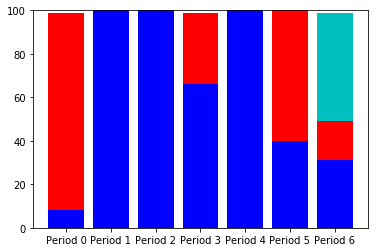

In [100]:
import numpy as np
import matplotlib.pyplot as plt

valeurs = period_relative
colours = ['b','g','r','c','m','y','k'] #to make sure colours remain the same throughout all slices
i_colours = dict()  # this dictionary stores the colour of a S

valeurs2 = dict()

for key in valeurs.keys():
    #print(key)
    key2 = "Period "+str(key)
    list_temp = list()
    for item in valeurs[key]:
        list_temp.append(int(item*100))   # let's have percentages and not .xx
    valeurs2[key2] = list_temp

    #for value in valeurs
    

for key,vals in valeurs2.items():
    print(key,vals)
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            i_colours[key[-1:],i] = colours[i]
            
        else:         
            previous = vals[i-1] + previous
            plt.bar(x=key, height=vals[i],bottom=previous,color=colours[i])
            i_colours[key[-1:],i] = colours[i]
            
plt.xticks(range(len(valeurs2)), valeurs2.keys())

expert_image = s_senses.name.split("/")[-1]

#plt.figure(figsize=(20,10))
image = plt.gcf()
image.savefig(dir_out+"/"+expert_image+".png")
plt.show()



In [26]:
print(valeurs2.keys())

dict_keys(['Period 0', 'Period 1', 'Period 2', 'Period 3', 'Period 4', 'Period 5', 'Period 6'])


In [42]:
print(k_s_match)

for key,vals in valeurs2.items():
    print(key,vals)
    print(type(key),type(vals))
    for i in range(0,len(vals)):
        print("expert sense",i,"=",vals[i],"has the colour",colours[i])


{0: 0, 1: 2, 2: 0, 3: 0, 4: 0}
Period 0 [25, 0, 75, 0]
<class 'str'> <class 'list'>
expert sense 0 = 25 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 75 has the colour r
expert sense 3 = 0 has the colour c
Period 1 [75, 0, 25, 0]
<class 'str'> <class 'list'>
expert sense 0 = 75 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 25 has the colour r
expert sense 3 = 0 has the colour c
Period 2 [100, 0, 0, 0]
<class 'str'> <class 'list'>
expert sense 0 = 100 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 0 has the colour r
expert sense 3 = 0 has the colour c
Period 3 [75, 0, 25, 0]
<class 'str'> <class 'list'>
expert sense 0 = 75 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 25 has the colour r
expert sense 3 = 0 has the colour c
Period 4 [100, 0, 0, 0]
<class 'str'> <class 'list'>
expert sense 0 = 100 has the colour b
expert sense 1 = 0 has the colour g
expert sense 2 = 0 has the colour r
expert sen

liste_number_year = list() # creating a list because matplotlib wants a tuple
for key in sense_date_amount.keys():
    #print(key)
    liste_number_year.append(sense_date_amount[key])
    
tuple_number_year = tuple(liste_number_year)
#print(tuple_number_year)

period_number = dict()

for key in sense_date_amount.keys():
    compteur = 0
    if key[1] in range(0,number_of_slices):
        print(key,sense_date_amount[key[0],key[1]])
        compteur += sense_date_amount[key[0],key[1]]
        
        try :
            period_number[key[1]] += compteur
        except KeyError:
            period_number[key[1]] = 0
            period_number[key[1]] += compteur
            
        
for entry in period_number:
    print("période",entry,"number of uses",period_number[entry])


## Reading model output for plotting

lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

In [30]:
print(period_relative_model)

{'0': [0.06797006677118084, 0.1214816905125435, 0.17669827020366105, 0.12895879539169736, 0.5048911771209171], '1': [0.07790171994077955, 0.17290706997570546, 0.27958592359688145, 0.07859446761922315, 0.39101081886741035], '2': [0.043116996463148594, 0.11447298831651283, 0.36562180932583266, 0.06528654631166778, 0.41150165958283824], '3': [0.09615350585735916, 0.0712382724299806, 0.45412589580600876, 0.12193385096189659, 0.2565484749447548], '4': [0.18943680519928655, 0.04746197723506132, 0.3559183313197357, 0.15253906981744492, 0.2546438164284715], '5': [0.2707895370827565, 0.11626292785519915, 0.3022599440527665, 0.21633130282134833, 0.09435628818792949], '6': [0.19094741083098585, 0.12263953089787188, 0.34777206706744807, 0.12509514825925955, 0.2135458429444348]}


## Plotting model output


Period 0 [0.06797006677118084, 0.1214816905125435, 0.17669827020366105, 0.12895879539169736, 0.5048911771209171]
<class 'str'> <class 'list'>


0 b
0 b
0 b
0 b


2 r


Period 1 [0.07790171994077955, 0.17290706997570546, 0.27958592359688145, 0.07859446761922315, 0.39101081886741035]
<class 'str'> <class 'list'>


0 b
0 b
0 b
0 b


2 r


Period 2 [0.043116996463148594, 0.11447298831651283, 0.36562180932583266, 0.06528654631166778, 0.41150165958283824]
<class 'str'> <class 'list'>


0 b
0 b
0 b
0 b


2 r


Period 3 [0.09615350585735916, 0.0712382724299806, 0.45412589580600876, 0.12193385096189659, 0.2565484749447548]
<class 'str'> <class 'list'>


0 b
0 b
0 b
0 b


2 r


Period 4 [0.18943680519928655, 0.04746197723506132, 0.3559183313197357, 0.15253906981744492, 0.2546438164284715]
<class 'str'> <class 'list'>


0 b
0 b
0 b
0 b


2 r


Period 5 [0.2707895370827565, 0.11626292785519915, 0.3022599440527665, 0.21633130282134833, 0.09435628818792949]
<class 'str'> <class 'list'>


0 b
0 b
0 b

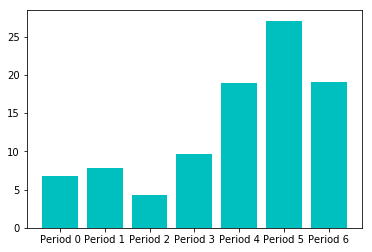

In [58]:
lines_output_plot = output_senses.split("===============  per time  ===============")[1].split("\n")
period_relative_model = dict()


for i in range(0,len(lines_output_plot)):
    if lines_output_plot[i][0:5] == "Time=":  # if a line starts with "time" we take it into account
        for x in range(i,i+number_of_the_k+1): # for every "number of  the k" lines that follow
            #print(lines_output_plot[x])
            if lines_output_plot[x][0:5] == "Time=": # if a line starts with "time" we take the value for the slice
                period = lines_output_plot[x][5:6]
                templist = list()
                
            if lines_output_plot[x][0:5] != "Time=":  # if a line doesn't start with "time" but is considered(cf line3)
                ligne = re.split("\s{3,}",lines_output_plot[x]) # we take the first part of the line (importance of that K)
                templist.append(float(ligne[0]))
            #print(period,templist)
            
        period_relative_model[str(period)] = templist

valeurs = period_relative_model
colours = ['b','g','r','c','m','y','k','w'] #to make sure colours remain the same throughout all slices


valeurs3 = dict()

for key in valeurs.keys():
    #print(key)
    key2 = "Period "+str(key)
    list_temp = list()
    for item in valeurs[key]:
        list_temp.append(item)   
    valeurs3[key2] = list_temp



for key,vals in valeurs3.items():
    print(key,vals)
    print(type(key),type(vals))
    
    for i in range(0,len(vals)):        
        if i == 0:
            previous = 0
  #          plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            for y in s_k_match[i]:
                try:
                    plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=i_colours[key[-1:],s_k_match[i][y]])
                except KeyError:
                    print("")
                except IndexError:
                    print("")
            
        else:         
            previous = vals[i-1] + previous
#            plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=colours[i])
            try:
                for y in s_k_match[i]:
                    try:
                        plt.bar(x=key, height=vals[i]*100,bottom=previous*100,color=i_colours[key[-1:],s_k_match[i][y]])
                    except KeyError:
                        print("")
                    except IndexError:
                        print("")
            except:
                print("")
                
        for value in k_s_match.values():
            if i == value: 
                print(i,colours[i])
        
plt.xticks(range(len(valeurs3)), valeurs3.keys())

#plt.figure(figsize=(20,10))

model_image = k_senses.name.split("/")[-1]

image = plt.gcf()
image.savefig(dir_out+"/"+model_image+".png")

plt.show()


In [33]:
print(s_k_match)

for key,vals in valeurs3.items():
    print(key,vals)
    #print(type(key),type(vals))
    for i in range(0,len(vals)):
        #print("model sense",i,"=",vals[i],"has the colour",colours[i])
        #print("this is the equivalent of")
        if k_s_match[i] != "NA":
            #print("expert sense",k_s_match[i],colours[int(k_s_match[i])],"\n")
            print(colours[i],"=====",colours[int(k_s_match[i])])
        else:
            print("NA\n")

{0: [0, 2, 3, 4], 2: [1]}
Period 0 [0.06797006677118084, 0.1214816905125435, 0.17669827020366105, 0.12895879539169736, 0.5048911771209171]
b ===== b
g ===== r
r ===== b
c ===== b
m ===== b
Period 1 [0.07790171994077955, 0.17290706997570546, 0.27958592359688145, 0.07859446761922315, 0.39101081886741035]
b ===== b
g ===== r
r ===== b
c ===== b
m ===== b
Period 2 [0.043116996463148594, 0.11447298831651283, 0.36562180932583266, 0.06528654631166778, 0.41150165958283824]
b ===== b
g ===== r
r ===== b
c ===== b
m ===== b
Period 3 [0.09615350585735916, 0.0712382724299806, 0.45412589580600876, 0.12193385096189659, 0.2565484749447548]
b ===== b
g ===== r
r ===== b
c ===== b
m ===== b
Period 4 [0.18943680519928655, 0.04746197723506132, 0.3559183313197357, 0.15253906981744492, 0.2546438164284715]
b ===== b
g ===== r
r ===== b
c ===== b
m ===== b
Period 5 [0.2707895370827565, 0.11626292785519915, 0.3022599440527665, 0.21633130282134833, 0.09435628818792949]
b ===== b
g ===== r
r ===== b
c ===== b
m

## TODO:
1. ~~Choose best (k,s) pair~~
1. Match k and s in the plots
2. Label the plots (senses, slices)
2. ~~Remove the "w" sense~~
3. Confidence interval (less important for now)
4. ~~Fix the recall calculation cfr email Valerio 28/03~~
5. ~~CHECK PROBABILITIES (conf)~~ 
6. Write output to file + sync github
7. ~~Fix length of time interval (100 vs 113)_~~ ||| earliest date [from parameter_file] vs time interval

best pair: the one with the maximum above a certain threshold

## TODO post meeting with B and V
1. plot distribution of senses across genres
2. plot distribution of genres across time

## TODO post 10/4 3pm:

- ~~when parsing senses_3874965.txt, if mus-x is followed by something else than "1", mark the sense as "NA"~~
- ~~when parsing senses_3874965.txt, add a parameter for window size~~